In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import combinations
import sklearn
#import geopandas

In [2]:
acidentes_excel = ['acidentes-2010.xlsx', 'acidentes-2011.xlsx', 'acidentes-2012.xlsx', 'acidentes-2013.xlsx', 
                   'acidentes-2014.xlsx', 'acidentes-2015.xlsx', 'acidentes-2016.xlsx', 'acidentes-2017.xlsx', 
                   'acidentes-2018.xlsx', 'acidentes-2019.xlsx']

acidentes = pd.DataFrame()
condutores = pd.DataFrame()
peoes = pd.DataFrame()

for arquivo in acidentes_excel:
    
    dados_temporarios_acidentes = pd.read_excel(arquivo, sheet_name='30 Dias _ Acidentes') 
    dados_temporarios_condutores = pd.read_excel(arquivo, sheet_name='30 Dias_Cond_Veic')
    dados_temporarios_peoes = pd.read_excel(arquivo, sheet_name='30 Dias_Peões')

    acidentes = pd.concat([acidentes, dados_temporarios_acidentes])
    condutores = pd.concat([condutores, dados_temporarios_condutores])
    peoes = pd.concat([peoes, dados_temporarios_peoes])


In [3]:
acidentes['Datahora'] = pd.to_datetime(acidentes['Datahora'], format='%Y:%m:%d %H:%M:%S')
condutores['Datahora'] = pd.to_datetime(condutores['Datahora'], format='%Y:%m:%d %H:%M:%S')

In [4]:
# há mais acidentes de transito nos dias que se seguem a mudança do horario de verao?

In [5]:
# acidentes por ano 

In [6]:
acidentes_2010 = acidentes[(acidentes["Datahora"] >= "2010-01-01") & (acidentes["Datahora"] <= "2010-12-31")]
acidentes_2011 = acidentes[(acidentes["Datahora"] >= "2011-01-01") & (acidentes["Datahora"] <= "2011-12-31")]
acidentes_2012 = acidentes[(acidentes["Datahora"] >= "2012-01-01") & (acidentes["Datahora"] <= "2012-12-31")]
acidentes_2013 = acidentes[(acidentes["Datahora"] >= "2013-01-01") & (acidentes["Datahora"] <= "2013-12-31")]
acidentes_2014 = acidentes[(acidentes["Datahora"] >= "2014-01-01") & (acidentes["Datahora"] <= "2014-12-31")]
acidentes_2015 = acidentes[(acidentes["Datahora"] >= "2015-01-01") & (acidentes["Datahora"] <= "2015-12-31")]
acidentes_2016 = acidentes[(acidentes["Datahora"] >= "2016-01-01") & (acidentes["Datahora"] <= "2016-12-31")]
acidentes_2017 = acidentes[(acidentes["Datahora"] >= "2017-01-01") & (acidentes["Datahora"] <= "2017-12-31")]
acidentes_2018 = acidentes[(acidentes["Datahora"] >= "2018-01-01") & (acidentes["Datahora"] <= "2018-12-31")]
acidentes_2019 = acidentes[(acidentes["Datahora"] >= "2019-01-01") & (acidentes["Datahora"] <= "2019-12-31")]

In [7]:
# média de acidentes por dia, para cada ano 

In [8]:
media_2010 = round((len(acidentes_2010)/365),1)
media_2011 = round((len(acidentes_2011)/365),1)
media_2012 = round((len(acidentes_2012)/366),1)
media_2013 = round((len(acidentes_2013)/365),1)
media_2014 = round((len(acidentes_2014)/365),1)
media_2015 = round((len(acidentes_2015)/365),1)
media_2016 = round((len(acidentes_2016)/366),1)
media_2017 = round((len(acidentes_2017)/365),1)
media_2018 = round((len(acidentes_2018)/365),1)
media_2019 = round((len(acidentes_2019)/365),1)

anos = {'Ano': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
         'Media de acidentes por dia': [media_2010, media_2011, media_2012, media_2013, media_2014, media_2015, media_2016, media_2017, media_2018, media_2019]}
media_acidentes_anos = pd.DataFrame(anos)
media_acidentes_anos

,Ano,Media de acidentes por dia
0,2010,96.8
1,2011,89.0
2,2012,81.4
3,2013,83.0
4,2014,83.7
5,2015,87.4
6,2016,88.1
7,2017,94.1
8,2018,93.6
9,2019,97.6


In [9]:
# media de acidentes no 7 dias seguintes a virada de horario, para cada ano 

In [10]:
dias7_seguintes_2010 = acidentes_2010.loc[
    (acidentes_2010["Datahora"].dt.month == 3) &
    (acidentes_2010["Datahora"].dt.day.isin([28, 29, 30, 31]))
    |(acidentes_2010["Datahora"].dt.month == 4) &
    (acidentes_2010["Datahora"].dt.day.isin([1, 2, 3]))]

dias7_seguintes_2011 = acidentes_2011.loc[
    (acidentes_2011["Datahora"].dt.month == 3) &
    (acidentes_2011["Datahora"].dt.day.isin([27, 28, 29, 30, 31]))
    |(acidentes_2011["Datahora"].dt.month == 4) &
    (acidentes_2011["Datahora"].dt.day.isin([1, 2]))]

dias7_seguintes_2012 = acidentes_2012.loc[
    (acidentes_2012["Datahora"].dt.month == 3) &
    (acidentes_2012["Datahora"].dt.day.isin([25, 26, 27, 28, 29, 30, 31]))]

dias7_seguintes_2013 = acidentes_2013.loc[
    (acidentes_2013["Datahora"].dt.month == 3) &
    (acidentes_2013["Datahora"].dt.day.isin([31]))
    |(acidentes_2013["Datahora"].dt.month == 4) &
    (acidentes_2013["Datahora"].dt.day.isin([1, 2, 3, 4, 5, 6]))]

dias7_seguintes_2014 = acidentes_2014.loc[
    (acidentes_2014["Datahora"].dt.month == 3) &
    (acidentes_2014["Datahora"].dt.day.isin([30, 31]))
    |(acidentes_2014["Datahora"].dt.month == 4) &
    (acidentes_2014["Datahora"].dt.day.isin([1, 2, 3, 4, 5]))]

dias7_seguintes_2015 = acidentes_2015.loc[
    (acidentes_2015["Datahora"].dt.month == 3) &
    (acidentes_2015["Datahora"].dt.day.isin([29, 30, 31]))
    |(acidentes_2015["Datahora"].dt.month == 4) &
    (acidentes_2015["Datahora"].dt.day.isin([1, 2, 3, 4]))]

dias7_seguintes_2016 = acidentes_2016.loc[
    (acidentes_2016["Datahora"].dt.month == 3) &
    (acidentes_2016["Datahora"].dt.day.isin([27, 28, 29, 30, 31]))
    |(acidentes_2016["Datahora"].dt.month == 4) &
    (acidentes_2016["Datahora"].dt.day.isin([1, 2]))]

dias7_seguintes_2017 = acidentes_2017.loc[
    (acidentes_2017["Datahora"].dt.month == 3) &
    (acidentes_2017["Datahora"].dt.day.isin([26, 27, 28, 29, 30, 31]))
    |(acidentes_2017["Datahora"].dt.month == 4) &
    (acidentes_2017["Datahora"].dt.day.isin([1]))]

dias7_seguintes_2018 = acidentes_2018.loc[
    (acidentes_2018["Datahora"].dt.month == 3) &
    (acidentes_2018["Datahora"].dt.day.isin([25, 26, 27, 28, 29, 30, 31]))]

dias7_seguintes_2019 = acidentes_2019.loc[
    (acidentes_2019["Datahora"].dt.month == 3) &
    (acidentes_2019["Datahora"].dt.day.isin([31]))
    |(acidentes_2019["Datahora"].dt.month == 4) &
    (acidentes_2019["Datahora"].dt.day.isin([1, 2, 3, 4, 5, 6]))]

media_7_dias_seguintes2010 = round((len(dias7_seguintes_2010)/7),1)
media_7_dias_seguintes2011 = round((len(dias7_seguintes_2011)/7),1)
media_7_dias_seguintes2012 = round((len(dias7_seguintes_2012)/7),1)
media_7_dias_seguintes2013 = round((len(dias7_seguintes_2013)/7),1)
media_7_dias_seguintes2014 = round((len(dias7_seguintes_2014)/7),1)
media_7_dias_seguintes2015 = round((len(dias7_seguintes_2015)/7),1)
media_7_dias_seguintes2016 = round((len(dias7_seguintes_2016)/7),1)
media_7_dias_seguintes2017 = round((len(dias7_seguintes_2017)/7),1)
media_7_dias_seguintes2018 = round((len(dias7_seguintes_2018)/7),1)
media_7_dias_seguintes2019 = round((len(dias7_seguintes_2019)/7),1)

lista = [media_7_dias_seguintes2010, media_7_dias_seguintes2011, media_7_dias_seguintes2012, media_7_dias_seguintes2013, media_7_dias_seguintes2014, media_7_dias_seguintes2015, media_7_dias_seguintes2016, media_7_dias_seguintes2017, media_7_dias_seguintes2018, media_7_dias_seguintes2019]

media_acidentes_anos["Media dos 7 dias seguintes"] = lista
media_acidentes_anos

,Ano,Media de acidentes por dia,Media dos 7 dias seguintes
0,2010,96.8,82.6
1,2011,89.0,92.7
2,2012,81.4,69.9
3,2013,83.0,76.4
4,2014,83.7,87.6
5,2015,87.4,77.6
6,2016,88.1,70.1
7,2017,94.1,82.0
8,2018,93.6,76.9
9,2019,97.6,102.6


Text(0.5, 1.0, 'Comparação entre a média diária de acidentes anual e a média diária da semana pós mudança')

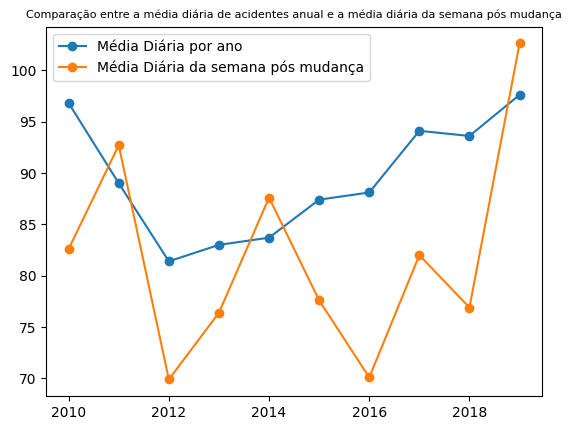

In [11]:
# grafico

plt.plot(media_acidentes_anos['Ano'], media_acidentes_anos['Media de acidentes por dia'], label='Média Diária por ano', marker='o')
plt.plot(media_acidentes_anos['Ano'], media_acidentes_anos['Media dos 7 dias seguintes'], label='Média Diária da semana pós mudança', marker='o')

plt.legend()
plt.title('Comparação entre a média diária de acidentes anual e a média diária da semana pós mudança', fontsize=8)

In [12]:
# analisando se algum tipo de acidente se destaca 

In [13]:
# acidentes por natureza ao longo do ano comparado com os 7 dias seguintes pos mudança

acidentes_por_natureza = acidentes.groupby(acidentes["Natureza"]).size().reset_index(name="Acidentes")
acidentes_por_natureza["Percentagem"] = round(acidentes_por_natureza["Acidentes"] / acidentes_por_natureza["Acidentes"].sum()*100, 2)
acidentes_por_natureza = acidentes_por_natureza.sort_values("Acidentes", ascending=False)
acidentes_por_natureza["Média por dia"] = round(acidentes_por_natureza["Acidentes"]/3652,2)

dias7_todos_anos = pd.concat([dias7_seguintes_2010, dias7_seguintes_2011, dias7_seguintes_2012, dias7_seguintes_2013, dias7_seguintes_2014, dias7_seguintes_2015, dias7_seguintes_2016, dias7_seguintes_2017, dias7_seguintes_2018, dias7_seguintes_2019], ignore_index=True)
dias_7_por_natureza = dias7_todos_anos.groupby(dias7_todos_anos["Natureza"]).size().reset_index(name="Acidentes 7 dias seguintes")
dias_7_por_natureza = dias_7_por_natureza.sort_values("Acidentes 7 dias seguintes", ascending = False)
dias_7_por_natureza["Percentagem 7 dias seguintes"] = round(dias_7_por_natureza["Acidentes 7 dias seguintes"] / dias_7_por_natureza["Acidentes 7 dias seguintes"].sum()*100, 2)
dias_7_por_natureza["Média por dia_7"] = round(dias_7_por_natureza["Acidentes 7 dias seguintes"]/70,2)

acidentes_por_natureza_comparacao = pd.merge(acidentes_por_natureza, dias_7_por_natureza, on="Natureza", how="inner")
acidentes_por_natureza_comparacao["Diferença"] = acidentes_por_natureza_comparacao["Percentagem 7 dias seguintes"] - acidentes_por_natureza_comparacao["Percentagem"]
acidentes_por_natureza_comparacao

,Natureza,Acidentes,Percentagem,Média por dia,Acidentes 7 dias seguintes,Percentagem 7 dias seguintes,Média por dia_7,Diferença
0,Colisão lateral com outro veículo em movimento,59630,18.21,16.33,1016,17.74,14.51,-0.47
1,Despiste simples,51552,15.75,14.12,891,15.56,12.73,-0.19
2,Atropelamento de peões,47654,14.56,13.05,729,12.73,10.41,-1.83
3,Colisão traseira com outro veículo em movimento,35855,10.95,9.82,666,11.63,9.51,0.68
4,Colisão frontal,29418,8.99,8.06,528,9.22,7.54,0.23
5,Colisão com outras situações,22743,6.95,6.23,352,6.15,5.03,-0.80
6,Despiste com capotamento,19723,6.02,5.40,415,7.25,5.93,1.23
7,Despiste sem dispositivo de retenção,13775,4.21,3.77,255,4.45,3.64,0.24
8,Despiste com colisão com veículo imobil. ou ob...,11446,3.50,3.13,206,3.60,2.94,0.10
9,Colisão com veiculo ou obstáculo na faixa de r...,10143,3.10,2.78,187,3.26,2.67,0.16


C:\Users\dougl\AppData\Local\Temp\ipykernel_1140\4182096052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro.rename(columns={'Média por dia': 'Anual'}, inplace=True)
C:\Users\dougl\AppData\Local\Temp\ipykernel_1140\4182096052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro.rename(columns={'Média por dia_7': 'Semana pós mudança'}, inplace=True)
C:\Users\dougl\AppData\Local\Temp\ipykernel_1140\4182096052.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=85)


Text(0.5, 1.0, 'Média de acidentes diários ao longo do ano e da semana seguinte pós mudança para cada natureza')

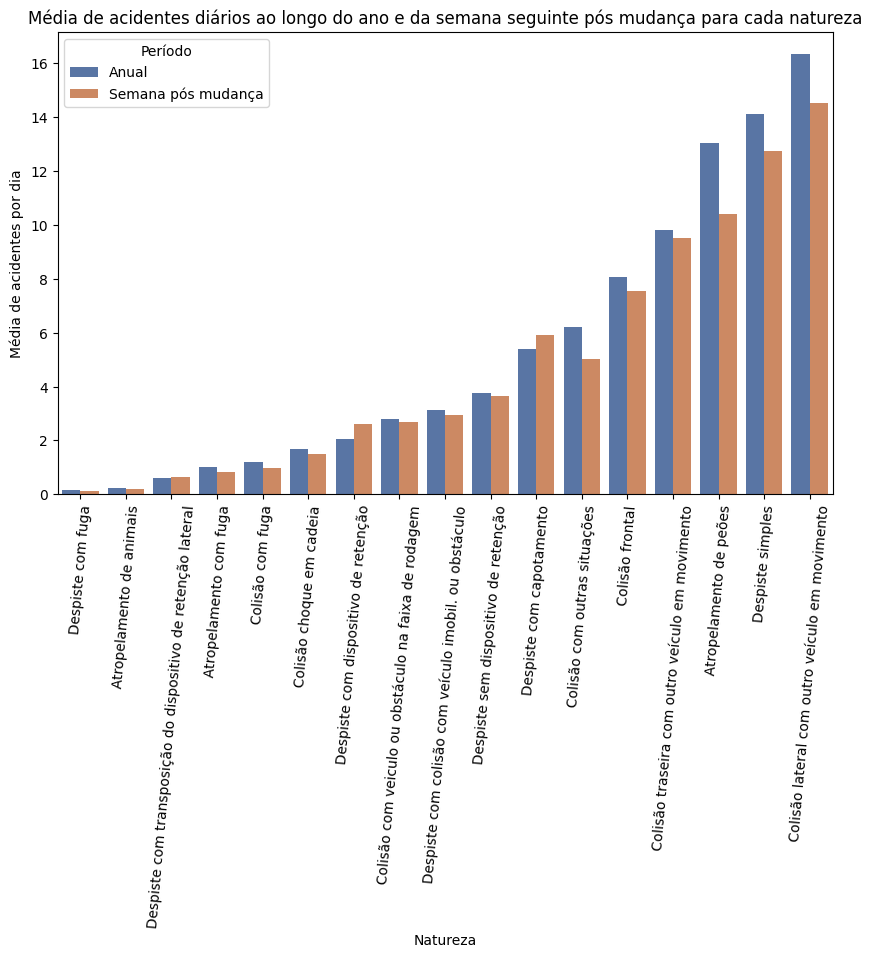

In [14]:
# gráfico media por naturezas

filtro = acidentes_por_natureza_comparacao[["Natureza", "Média por dia", "Média por dia_7"]]

filtro.rename(columns={'Média por dia': 'Anual'}, inplace=True)
filtro.rename(columns={'Média por dia_7': 'Semana pós mudança'}, inplace=True)


melted = pd.melt(filtro, id_vars='Natureza', var_name='Período', value_name='Média de acidentes por dia')


melted1 = melted[melted['Período'] == 'Anual'].sort_values(by='Média de acidentes por dia')
melted2 = melted[melted['Período'] == 'Semana pós mudança']

melted3 = pd.concat([melted1, melted2], ignore_index = True)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Natureza', y='Média de acidentes por dia', hue='Período', data=melted3, palette='deep')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85)

plt.title("Média de acidentes diários ao longo do ano e da semana seguinte pós mudança para cada natureza")

In [15]:
# analisando se algum estado do condutor aumenta nos dias que se seguem

In [16]:
condutores_2010 = condutores[(condutores["Datahora"] >= "2010-01-01") & (condutores["Datahora"] <= "2010-12-31")]
condutores_2011 = condutores[(condutores["Datahora"] >= "2011-01-01") & (condutores["Datahora"] <= "2011-12-31")]
condutores_2012 = condutores[(condutores["Datahora"] >= "2012-01-01") & (condutores["Datahora"] <= "2012-12-31")]
condutores_2013 = condutores[(condutores["Datahora"] >= "2013-01-01") & (condutores["Datahora"] <= "2013-12-31")]
condutores_2014 = condutores[(condutores["Datahora"] >= "2014-01-01") & (condutores["Datahora"] <= "2014-12-31")]
condutores_2015 = condutores[(condutores["Datahora"] >= "2015-01-01") & (condutores["Datahora"] <= "2015-12-31")]
condutores_2016 = condutores[(condutores["Datahora"] >= "2016-01-01") & (condutores["Datahora"] <= "2016-12-31")]
condutores_2017 = condutores[(condutores["Datahora"] >= "2017-01-01") & (condutores["Datahora"] <= "2017-12-31")]
condutores_2018 = condutores[(condutores["Datahora"] >= "2018-01-01") & (condutores["Datahora"] <= "2018-12-31")]
condutores_2019 = condutores[(condutores["Datahora"] >= "2019-01-01") & (condutores["Datahora"] <= "2019-12-31")]

dias7_condutores_2010 = condutores_2010.loc[
    (condutores_2010["Datahora"].dt.month == 3) &
    (condutores_2010["Datahora"].dt.day.isin([28, 29, 30, 31]))
    |(condutores_2010["Datahora"].dt.month == 4) &
    (condutores_2010["Datahora"].dt.day.isin([1, 2, 3]))]

dias7_condutores_2011 = condutores_2011.loc[
    (condutores_2011["Datahora"].dt.month == 3) &
    (condutores_2011["Datahora"].dt.day.isin([27, 28, 29, 30, 31]))
    |(condutores_2011["Datahora"].dt.month == 4) &
    (condutores_2011["Datahora"].dt.day.isin([1, 2]))]

dias7_condutores_2012 = condutores_2012.loc[
    (condutores_2012["Datahora"].dt.month == 3) &
    (condutores_2012["Datahora"].dt.day.isin([25, 26, 27, 28, 29, 30, 31]))]

dias7_condutores_2013 = condutores_2013.loc[
    (condutores_2013["Datahora"].dt.month == 3) &
    (condutores_2013["Datahora"].dt.day.isin([31]))
    |(condutores_2013["Datahora"].dt.month == 4) &
    (condutores_2013["Datahora"].dt.day.isin([1, 2, 3, 4, 5, 6]))]

dias7_condutores_2014 = condutores_2014.loc[
    (condutores_2014["Datahora"].dt.month == 3) &
    (condutores_2014["Datahora"].dt.day.isin([30, 31]))
    |(condutores_2014["Datahora"].dt.month == 4) &
    (condutores_2014["Datahora"].dt.day.isin([1, 2, 3, 4, 5]))]

dias7_condutores_2015 = condutores_2015.loc[
    (condutores_2015["Datahora"].dt.month == 3) &
    (condutores_2015["Datahora"].dt.day.isin([29, 30, 31]))
    |(condutores_2015["Datahora"].dt.month == 4) &
    (condutores_2015["Datahora"].dt.day.isin([1, 2, 3, 4]))]

dias7_condutores_2016 = condutores_2016.loc[
    (condutores_2016["Datahora"].dt.month == 3) &
    (condutores_2016["Datahora"].dt.day.isin([27, 28, 29, 30, 31]))
    |(condutores_2016["Datahora"].dt.month == 4) &
    (condutores_2016["Datahora"].dt.day.isin([1, 2]))]

dias7_condutores_2017 = condutores_2017.loc[
    (condutores_2017["Datahora"].dt.month == 3) &
    (condutores_2017["Datahora"].dt.day.isin([26, 27, 28, 29, 30, 31]))
    |(condutores_2017["Datahora"].dt.month == 4) &
    (condutores_2017["Datahora"].dt.day.isin([1]))]

dias7_condutores_2018 = condutores_2018.loc[
    (condutores_2018["Datahora"].dt.month == 3) &
    (condutores_2018["Datahora"].dt.day.isin([25, 26, 27, 28, 29, 30, 31]))]

dias7_condutores_2019 = condutores_2019.loc[
    (condutores_2019["Datahora"].dt.month == 3) &
    (condutores_2019["Datahora"].dt.day.isin([31]))
    |(condutores_2019["Datahora"].dt.month == 4) &
    (condutores_2019["Datahora"].dt.day.isin([1, 2, 3, 4, 5, 6]))]

In [17]:
# condutores por nomesfatores ao longo do ano comparado com os 7 dias seguintes pos mudança

condutores_por_outrosfat = condutores.groupby(condutores["Nomeoutrosfactores"]).size().reset_index(name="Condutores")
condutores_por_outrosfat["Percentagem"] = round(condutores_por_outrosfat["Condutores"] / condutores_por_outrosfat["Condutores"].sum()*100, 2)
condutores_por_outrosfat = condutores_por_outrosfat.sort_values("Condutores", ascending=False)
condutores_por_outrosfat["Média por dia"] = round(condutores_por_outrosfat["Condutores"]/3652, 2)

dias7_condutores_todos_anos = pd.concat([dias7_condutores_2010, dias7_condutores_2011, dias7_condutores_2012, dias7_condutores_2013, dias7_condutores_2014, dias7_condutores_2015, dias7_condutores_2016, dias7_condutores_2017, dias7_condutores_2018, dias7_condutores_2019], ignore_index=True)
dias_7_condutores_por_outrosfat = dias7_condutores_todos_anos.groupby(dias7_condutores_todos_anos["Nomeoutrosfactores"]).size().reset_index(name="Condutores 7 dias seguintes")
dias_7_condutores_por_outrosfat = dias_7_condutores_por_outrosfat.sort_values("Condutores 7 dias seguintes", ascending = False)
dias_7_condutores_por_outrosfat["Percentagem 7 dias seguintes"] = round(dias_7_condutores_por_outrosfat["Condutores 7 dias seguintes"] / dias_7_condutores_por_outrosfat["Condutores 7 dias seguintes"].sum()*100, 2)
dias_7_condutores_por_outrosfat["Média por dia_7"] = round(dias_7_condutores_por_outrosfat["Condutores 7 dias seguintes"]/70, 2)

condutores_por_fatores_comparacao = pd.merge(condutores_por_outrosfat, dias_7_condutores_por_outrosfat, on="Nomeoutrosfactores", how="inner")
condutores_por_fatores_comparacao["Diferença"] = condutores_por_fatores_comparacao["Percentagem 7 dias seguintes"] - condutores_por_fatores_comparacao["Percentagem"]
condutores_por_fatores_comparacao

,Nomeoutrosfactores,Condutores,Percentagem,Média por dia,Condutores 7 dias seguintes,Percentagem 7 dias seguintes,Média por dia_7,Diferença
0,Normal,453320,91.40,124.13,7905,91.66,112.93,0.26
1,Distracção,20301,4.09,5.56,345,4.00,4.93,-0.09
2,Exames Psicotrópicos,11827,2.38,3.24,174,2.02,2.49,-0.36
3,NÃO DEFINIDO,3186,0.64,0.87,93,1.08,1.33,0.44
4,Sono/sonolência,2710,0.55,0.74,35,0.41,0.50,-0.14
5,Doença súbita,1612,0.33,0.44,31,0.36,0.44,0.03
6,Droga por despistagem,1515,0.31,0.41,19,0.22,0.27,-0.09
7,Fadiga,1511,0.30,0.41,22,0.26,0.31,-0.04


In [18]:
# analisando pela parte da manhã

dias7_condutores_todos_anos_manha = dias7_condutores_todos_anos.loc[(dias7_condutores_todos_anos['Datahora'].dt.hour > 5) 
                                                                    & (dias7_condutores_todos_anos['Datahora'].dt.hour < 12)]
condutores_manha = condutores.loc[(condutores['Datahora'].dt.hour > 5) & (condutores['Datahora'].dt.hour < 12)]

dias7_condutores_todos_anos_manha = dias7_condutores_todos_anos_manha.groupby(dias7_condutores_todos_anos_manha['Nomeoutrosfactores']).size().reset_index(name='Condutores')
condutores_manha = condutores_manha.groupby(condutores_manha['Nomeoutrosfactores']).size().reset_index(name='CondutoresT')

dias7_condutores_todos_anos_manha['Media 7 dias'] = round((dias7_condutores_todos_anos_manha['Condutores'] / 70),1)
condutores_manha['Media'] = round((condutores_manha['CondutoresT'] / 3652),1)
 
condutores_todos_manha = pd.merge(dias7_condutores_todos_anos_manha, condutores_manha, on='Nomeoutrosfactores', how='inner')
condutores_todos_manha

,Nomeoutrosfactores,Condutores,Media 7 dias,CondutoresT,Media
0,Distracção,92,1.3,5595,1.5
1,Doença súbita,11,0.2,494,0.1
2,Droga por despistagem,3,0.0,362,0.1
3,Exames Psicotrópicos,44,0.6,2582,0.7
4,Fadiga,8,0.1,377,0.1
5,Normal,2194,31.3,131093,35.9
6,NÃO DEFINIDO,9,0.1,476,0.1
7,Sono/sonolência,13,0.2,830,0.2


In [19]:
# Observando se acontecem mais acidentes com conducao mais longa nos 7 dias seguintes

conducao_longa = condutores.loc[(condutores['Tempo Condução Continuada'] == 'De 1 a 3 horas') | (condutores['Tempo Condução Continuada'] == 'De 3 a 5 horas')
                                | (condutores['Tempo Condução Continuada'] == 'Mais de 5 horas')]

conducao_longa_7dias = dias7_condutores_todos_anos.loc[(dias7_condutores_todos_anos['Tempo Condução Continuada'] == 'De 1 a 3 horas') | (dias7_condutores_todos_anos['Tempo Condução Continuada'] == 'De 3 a 5 horas')
                                | (dias7_condutores_todos_anos['Tempo Condução Continuada'] == 'Mais de 5 horas')]

conducao_longa7 = round((len(conducao_longa_7dias) / len(dias7_condutores_todos_anos) * 100),2)
conducao_longaT = round((len(conducao_longa) / len(condutores) * 100),2)

dados_conducao = {'Nos 7 dias seguintes':conducao_longa7,
                  'No geral': conducao_longaT}

dados_conducao_df = pd.DataFrame(dados_conducao, index=['Percentagem de conducao longa'])

dados_conducao_df

,Nos 7 dias seguintes,No geral
Percentagem de conducao longa,7.86,7.77


In [20]:
# analisando se a gravidade dos acidentes na semana seguinte aumenta 

dias7_condutores_ferimentos = dias7_condutores_todos_anos.groupby('Lesões a 30 dias').size().reset_index(name='Condutores7')
dias7_condutores_ferimentos['Media por dia (dos 7 dias seguintes)'] = round((dias7_condutores_ferimentos['Condutores7'] / 49),2)

condutores_ferimentos = condutores.groupby('Lesões a 30 dias').size().reset_index(name='CondutoresT')
condutores_ferimentos['Media por dia'] = round((condutores_ferimentos['CondutoresT'] / 3652),2)

condutores_ferimentos_e_dias7 = pd.merge(dias7_condutores_ferimentos, condutores_ferimentos, on='Lesões a 30 dias', how='inner')
condutores_ferimentos_e_dias7

,Lesões a 30 dias,Condutores7,Media por dia (dos 7 dias seguintes),CondutoresT,Media por dia
0,Ferido grave,251,5.12,15657,4.29
1,Ferido leve,4188,85.47,235605,64.51
2,Ileso,4132,84.33,240434,65.84
3,Morto,53,1.08,4220,1.16


In [21]:
# Comparando os acidentes nas Segundas Feiras pos mudanca de horario com todas as outras

acidentes_segunda = acidentes.loc[acidentes["Dia da Semana"] == "Segunda-Feira"]

acidentes_por_segunda = acidentes_segunda.groupby(acidentes_segunda["Datahora"].dt.date).size().reset_index(name='Acidentes')
acidentes_por_segunda['Datahora'] = pd.to_datetime(acidentes_por_segunda['Datahora'], format='%Y:%m:%d')
acidentes_por_segunda_pos_mudanca = acidentes_por_segunda.loc[(acidentes_por_segunda['Datahora'] == '2010-03-29') | (acidentes_por_segunda['Datahora'] == '2011-03-28')
                                                            | (acidentes_por_segunda['Datahora'] == '2012-03-26') | (acidentes_por_segunda['Datahora'] == '2013-04-01')
                                                            | (acidentes_por_segunda['Datahora'] == '2014-03-31') | (acidentes_por_segunda['Datahora'] == '2015-03-30')
                                                            | (acidentes_por_segunda['Datahora'] == '2016-03-28') | (acidentes_por_segunda['Datahora'] == '2017-03-27')
                                                            | (acidentes_por_segunda['Datahora'] == '2018-03-26') | (acidentes_por_segunda['Datahora'] == '2019-04-01')]

acidentes_por_segunda_sem_mudanca = acidentes_por_segunda[~acidentes_por_segunda.isin(acidentes_por_segunda_pos_mudanca.to_dict('list')).all(axis=1)]
media_segundas_sem_mudanca = round((acidentes_por_segunda_sem_mudanca['Acidentes'].mean()),2)
media_segundas_com_mudanca = round((acidentes_por_segunda_pos_mudanca['Acidentes'].mean()),2)

tabela_segundas = {'Media Segundas sem mudanca': media_segundas_sem_mudanca, 'Media Segundas pos mudanca': media_segundas_com_mudanca}
tabela_segundas = pd.DataFrame(tabela_segundas, index=['Acidentes', 'Acidentes manha', 'CondutoresSDF', 'Condutores Conducao Longa'])
tabela_segundas = tabela_segundas.T

# acidentes segundas parte da manha

acidentes_segunda_manha = acidentes_segunda.loc[(acidentes_segunda['Hora'].dt.hour > 5) & (acidentes_segunda['Hora'].dt.hour < 12)]
acidentes_por_segunda_manha = acidentes_segunda_manha.groupby(acidentes_segunda_manha["Datahora"].dt.date).size().reset_index(name='Acidentes')
acidentes_por_segunda_manha['Datahora'] = pd.to_datetime(acidentes_por_segunda_manha['Datahora'], format='%Y:%m:%d')

acidentes_por_segunda_pos_mudanca_manha = acidentes_por_segunda_manha.loc[(acidentes_por_segunda_manha['Datahora'] == '2010-03-29') | (acidentes_por_segunda_manha['Datahora'] == '2011-03-28')
                                                            | (acidentes_por_segunda_manha['Datahora'] == '2012-03-26') | (acidentes_por_segunda_manha['Datahora'] == '2013-04-01')
                                                            | (acidentes_por_segunda_manha['Datahora'] == '2014-03-31') | (acidentes_por_segunda_manha['Datahora'] == '2015-03-30')
                                                            | (acidentes_por_segunda_manha['Datahora'] == '2016-03-28') | (acidentes_por_segunda_manha['Datahora'] == '2017-03-27')
                                                            | (acidentes_por_segunda_manha['Datahora'] == '2018-03-26') | (acidentes_por_segunda_manha['Datahora'] == '2019-04-01')]

acidentes_por_segunda_sem_mudanca_manha = acidentes_por_segunda_manha[~acidentes_por_segunda_manha.isin(acidentes_por_segunda_pos_mudanca_manha.to_dict('list')).all(axis=1)]

media_segundas_sem_mudanca_manha = round((acidentes_por_segunda_sem_mudanca_manha['Acidentes'].mean()),2)
media_segundas_com_mudanca_manha = round((acidentes_por_segunda_pos_mudanca_manha['Acidentes'].mean()),2)

tabela_segundas['Acidentes manha'] = [media_segundas_sem_mudanca_manha, media_segundas_com_mudanca_manha]

# condutores sonolencia, Doença súbita, fadiga, distracao de segundas feiras

condutores_segunda = condutores.loc[condutores["Datahora"].dt.day_name() == "Monday"]

condutoresSDF_segunda = condutores_segunda.loc[(condutores_segunda['Nomeoutrosfactores'] == 'Distracção')
                                                    | (condutores_segunda['Nomeoutrosfactores'] == 'Doença súbita')
                                                    | (condutores_segunda['Nomeoutrosfactores'] == 'Sono/sonolência')
                                                    | (condutores_segunda['Nomeoutrosfactores'] == 'Fadiga')]

condutoresSDF_por_segunda = condutoresSDF_segunda.groupby(condutoresSDF_segunda["Datahora"].dt.date).size().reset_index(name='CondutoresSDF')
condutoresSDF_por_segunda['Datahora'] = pd.to_datetime(condutoresSDF_por_segunda['Datahora'], format='%Y:%m:%d')

condutoresSDF_por_segunda_pos_mudanca = condutoresSDF_por_segunda.loc[(condutoresSDF_por_segunda['Datahora'] == '2010-03-29') | (condutoresSDF_por_segunda['Datahora'] == '2011-03-28')
                                                            | (condutoresSDF_por_segunda['Datahora'] == '2012-03-26') | (condutoresSDF_por_segunda['Datahora'] == '2013-04-01')
                                                            | (condutoresSDF_por_segunda['Datahora'] == '2014-03-31') | (condutoresSDF_por_segunda['Datahora'] == '2015-03-30')
                                                            | (condutoresSDF_por_segunda['Datahora'] == '2016-03-28') | (condutoresSDF_por_segunda['Datahora'] == '2017-03-27')
                                                            | (condutoresSDF_por_segunda['Datahora'] == '2018-03-26') | (condutoresSDF_por_segunda['Datahora'] == '2019-04-01')]

condutoresSDF_por_segunda_sem_mudanca = condutoresSDF_por_segunda[~condutoresSDF_por_segunda.isin(condutoresSDF_por_segunda_pos_mudanca.to_dict('list')).all(axis=1)]

media_segundas_sem_mudanca_condutores = round((condutoresSDF_por_segunda_sem_mudanca['CondutoresSDF'].mean()),2)
media_segundas_com_mudanca_condutores = round((condutoresSDF_por_segunda_pos_mudanca['CondutoresSDF'].mean()),2)

tabela_segundas['CondutoresSDF'] = [media_segundas_sem_mudanca_condutores, media_segundas_com_mudanca_condutores]

# condutores com conducao longa nas segundas feiras

conducao_longa_segunda = condutores_segunda.loc[(condutores_segunda['Tempo Condução Continuada'] == 'De 1 a 3 horas') | (condutores_segunda['Tempo Condução Continuada'] == 'De 3 a 5 horas')
                                | (condutores_segunda['Tempo Condução Continuada'] == 'Mais de 5 horas')]

conducao_longa_por_segunda = conducao_longa_segunda.groupby(conducao_longa_segunda["Datahora"].dt.date).size().reset_index(name='Condutores Conducao Longa')
conducao_longa_por_segunda['Datahora'] = pd.to_datetime(conducao_longa_por_segunda['Datahora'], format='%Y:%m:%d')

conducao_longa_por_segunda_pos_mudanca = conducao_longa_por_segunda.loc[(conducao_longa_por_segunda['Datahora'] == '2010-03-29') | (conducao_longa_por_segunda['Datahora'] == '2011-03-28')
                                                            | (conducao_longa_por_segunda['Datahora'] == '2012-03-26') | (conducao_longa_por_segunda['Datahora'] == '2013-04-01')
                                                            | (conducao_longa_por_segunda['Datahora'] == '2014-03-31') | (conducao_longa_por_segunda['Datahora'] == '2015-03-30')
                                                            | (conducao_longa_por_segunda['Datahora'] == '2016-03-28') | (conducao_longa_por_segunda['Datahora'] == '2017-03-27')
                                                            | (conducao_longa_por_segunda['Datahora'] == '2018-03-26') | (conducao_longa_por_segunda['Datahora'] == '2019-04-01')]

conducao_longa_por_segunda_sem_mudanca = conducao_longa_por_segunda[~conducao_longa_por_segunda.isin(conducao_longa_por_segunda_pos_mudanca.to_dict('list')).all(axis=1)]

media_segundas_sem_mudanca_conducao_longa = round((conducao_longa_por_segunda_sem_mudanca['Condutores Conducao Longa'].mean()),2)
media_segundas_com_mudanca_conducao_longa = round((conducao_longa_por_segunda_pos_mudanca['Condutores Conducao Longa'].mean()),2)

tabela_segundas['Condutores Conducao Longa'] = [media_segundas_sem_mudanca_conducao_longa, media_segundas_com_mudanca_conducao_longa]

tabela_segundas

,Acidentes,Acidentes manha,CondutoresSDF,Condutores Conducao Longa
Media Segundas sem mudanca,92.94,28.43,7.7,11.37
Media Segundas pos mudanca,93.70,27.50,6.5,11.20


In [22]:
# argumento a favor: menos acidentes por ter mais luz do sol 

In [23]:
acidentes["Hora"] = acidentes["Hora"].dt.time

In [24]:
acidentes['Hora'] = pd.to_datetime(acidentes['Hora'], format='%H:%M:%S')

In [25]:
acidentes["Hora cheia"] = acidentes["Hora"].dt.hour

In [26]:
# acidentes por hora

In [27]:
acidentes_hora = acidentes[["Id. Acidente", "Hora cheia"]]
acidentes_por_hora_df = acidentes_hora.groupby(acidentes["Hora cheia"]).size().reset_index(name="Acidentes")

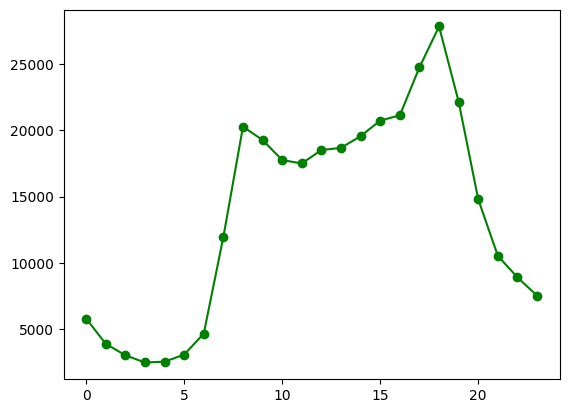

In [28]:
hora_cheia_array = np.array(acidentes_por_hora_df['Hora cheia'])
acidentes_array = np.array(acidentes_por_hora_df['Acidentes'])
plt.plot(hora_cheia_array, acidentes_array, marker='o', linestyle='-', color='green')

In [29]:
# somente hora inverno

In [30]:
acidentes['Datahora'] = pd.to_datetime(acidentes['Datahora'], format='%Y:%m:%d %H:%M:%S')

In [31]:
hora_inverno = acidentes[(acidentes["Datahora"] >= "2010-10-31") & (acidentes["Datahora"] <= "2010-12-31")
                        |(acidentes["Datahora"] >= "2010-01-01") & (acidentes["Datahora"] <= "2010-03-27")
                        |(acidentes["Datahora"] >= "2011-10-30") & (acidentes["Datahora"] <= "2011-12-31")
                        |(acidentes["Datahora"] >= "2011-01-01") & (acidentes["Datahora"] <= "2011-03-26")
                        |(acidentes["Datahora"] >= "2012-10-28") & (acidentes["Datahora"] <= "2012-12-31")
                        |(acidentes["Datahora"] >= "2012-01-01") & (acidentes["Datahora"] <= "2012-03-24")
                        |(acidentes["Datahora"] >= "2013-10-27") & (acidentes["Datahora"] <= "2013-12-31")
                        |(acidentes["Datahora"] >= "2013-01-01") & (acidentes["Datahora"] <= "2013-03-30")
                        |(acidentes["Datahora"] >= "2014-10-26") & (acidentes["Datahora"] <= "2014-12-31")
                        |(acidentes["Datahora"] >= "2014-01-01") & (acidentes["Datahora"] <= "2014-03-25")
                        |(acidentes["Datahora"] >= "2015-10-25") & (acidentes["Datahora"] <= "2015-12-31")
                        |(acidentes["Datahora"] >= "2015-01-01") & (acidentes["Datahora"] <= "2015-03-28")
                        |(acidentes["Datahora"] >= "2016-10-30") & (acidentes["Datahora"] <= "2016-12-31")
                        |(acidentes["Datahora"] >= "2016-01-01") & (acidentes["Datahora"] <= "2016-03-26")
                        |(acidentes["Datahora"] >= "2017-10-29") & (acidentes["Datahora"] <= "2017-12-31")
                        |(acidentes["Datahora"] >= "2017-01-01") & (acidentes["Datahora"] <= "2017-03-25")
                        |(acidentes["Datahora"] >= "2018-10-28") & (acidentes["Datahora"] <= "2018-12-31")
                        |(acidentes["Datahora"] >= "2018-01-01") & (acidentes["Datahora"] <= "2018-03-24")
                        |(acidentes["Datahora"] >= "2019-10-27") & (acidentes["Datahora"] <= "2019-12-31")
                        |(acidentes["Datahora"] >= "2019-01-01") & (acidentes["Datahora"] <= "2019-03-30")]


In [32]:
acidentes_hora_inverno = hora_inverno[["Id. Acidente", "Hora cheia"]]

In [33]:
acidentes_por_hora_inverno = acidentes_hora_inverno.groupby(acidentes_hora_inverno["Hora cheia"])

In [34]:
acidentes_por_hora_df_inverno = acidentes_por_hora_inverno.size().reset_index(name="Acidentes")

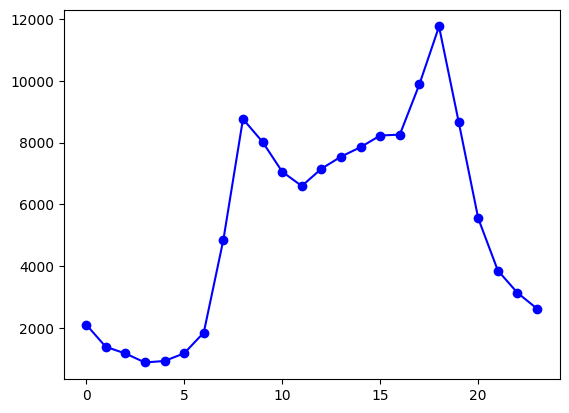

In [35]:
por_hora_df_inverno_array = np.array(acidentes_por_hora_df_inverno['Hora cheia'])
acidentes_por_hora_df_inverno_array = np.array(acidentes_por_hora_df_inverno['Acidentes'])
plt.plot(por_hora_df_inverno_array, acidentes_por_hora_df_inverno_array, marker='o', linestyle='-', color='b')

In [36]:
# somente hora verao

In [37]:
hora_verao = acidentes[(acidentes["Datahora"] >= "2010-03-29") & (acidentes["Datahora"] <= "2010-10-30")
                    |(acidentes["Datahora"] >= "2011-03-27") & (acidentes["Datahora"] <= "2011-10-29")
                    |(acidentes["Datahora"] >= "2012-03-25") & (acidentes["Datahora"] <= "2012-10-27")
                    |(acidentes["Datahora"] >= "2013-03-31") & (acidentes["Datahora"] <= "2013-10-26")
                    |(acidentes["Datahora"] >= "2014-03-26") & (acidentes["Datahora"] <= "2014-10-25")
                    |(acidentes["Datahora"] >= "2015-03-29") & (acidentes["Datahora"] <= "2015-10-24")
                    |(acidentes["Datahora"] >= "2016-03-27") & (acidentes["Datahora"] <= "2016-10-29")
                    |(acidentes["Datahora"] >= "2017-03-26") & (acidentes["Datahora"] <= "2017-10-28")
                    |(acidentes["Datahora"] >= "2018-03-25") & (acidentes["Datahora"] <= "2018-10-27")
                    |(acidentes["Datahora"] >= "2019-03-31") & (acidentes["Datahora"] <= "2019-10-26")]

In [38]:
acidentes_hora_verao = hora_verao[["Id. Acidente", "Hora cheia"]]

In [39]:
acidentes_por_hora_verao = acidentes_hora_verao.groupby(acidentes_hora_verao["Hora cheia"])

In [40]:
acidentes_por_hora_df_verao = acidentes_por_hora_verao.size().reset_index(name="Acidentes")

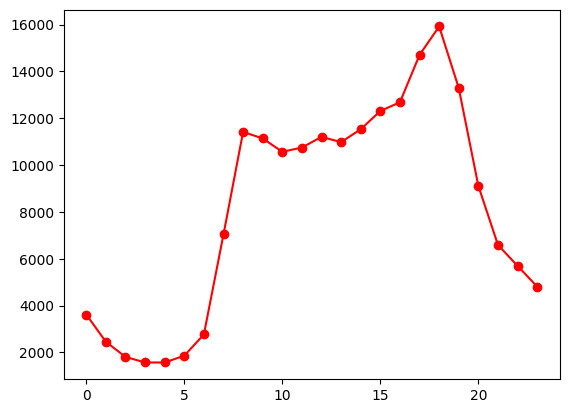

In [41]:
por_hora_df_verao_array = np.array(acidentes_por_hora_df_verao['Hora cheia'])
acidentes_por_hora_df_verao_array = np.array(acidentes_por_hora_df_verao['Acidentes'])

plt.plot(por_hora_df_verao_array, acidentes_por_hora_df_verao_array, marker='o', linestyle='-', color='red')

In [42]:
# percentagem de acidentes das 17 as 21 no horario de verao

filtro_horas_verao = (acidentes_por_hora_df_verao['Hora cheia'] >= 17) & (acidentes_por_hora_df_verao['Hora cheia'] < 21)
linhas_selecionadas_verao = acidentes_por_hora_df_verao.loc[filtro_horas_verao]
perc = round((linhas_selecionadas_verao['Acidentes'].sum() / acidentes_por_hora_df_verao['Acidentes'].sum() * 100),2)
perc

27.13

In [43]:
# percentagem de acidentes das 17 as 21 no horario de inverno

filtro_horas_inverno = (acidentes_por_hora_df_inverno['Hora cheia'] >= 17) & (acidentes_por_hora_df_inverno['Hora cheia'] < 21)
linhas_selecionadas_inverno = acidentes_por_hora_df_inverno.loc[filtro_horas_inverno]
perc = round((linhas_selecionadas_inverno['Acidentes'].sum() / acidentes_por_hora_df_inverno['Acidentes'].sum() * 100),2)
perc

27.73

In [44]:
## a natureza mais afetada pela diferenca de horario

In [45]:
acidentes_verao_por_natureza = hora_verao.groupby(hora_verao['Natureza']).size().reset_index(name="Acidentes_verao")
acidentes_inverno_por_natureza = hora_inverno.groupby(hora_inverno['Natureza']).size().reset_index(name="Acidentes_inverno")

acidentes_verao_por_natureza['Percentagem_verao'] = round((acidentes_verao_por_natureza['Acidentes_verao'] / acidentes_verao_por_natureza['Acidentes_verao'].sum() * 100),2)
acidentes_inverno_por_natureza['Percentagem_inverno'] = round((acidentes_inverno_por_natureza['Acidentes_inverno'] / acidentes_inverno_por_natureza['Acidentes_inverno'].sum() * 100),2)

acidentes_verao_inverno_natureza = pd.merge(acidentes_verao_por_natureza, acidentes_inverno_por_natureza, on='Natureza', how='inner')

acidentes_verao_inverno_natureza["Diferença Percentagem"] = acidentes_verao_inverno_natureza["Percentagem_inverno"] - acidentes_verao_inverno_natureza["Percentagem_verao"] 

acidentes_verao_inverno_natureza = acidentes_verao_inverno_natureza.sort_values(by="Diferença Percentagem", ascending=False) 
acidentes_verao_inverno_natureza

,Natureza,Acidentes_verao,Percentagem_verao,Acidentes_inverno,Percentagem_inverno,Diferença Percentagem
2,Atropelamento de peões,25321,12.96,22010,17.01,4.05
12,Despiste com dispositivo de retenção,3933,2.01,3428,2.65,0.64
0,Atropelamento com fuga,2108,1.08,1599,1.24,0.16
14,Despiste com transposição do dispositivo de re...,1283,0.66,967,0.75,0.09
10,Despiste com capotamento,11699,5.99,7844,6.06,0.07
3,Colisão choque em cadeia,3693,1.89,2501,1.93,0.04
6,Colisão com veiculo ou obstáculo na faixa de r...,6038,3.09,4042,3.12,0.03
1,Atropelamento de animais,463,0.24,329,0.25,0.01
13,Despiste com fuga,392,0.20,249,0.19,-0.01
4,Colisão com fuga,2689,1.38,1611,1.25,-0.13


In [46]:
# natureza mais afetada das 17 as 21

hora_verao1721 = hora_verao.loc[(hora_verao['Hora cheia'] >= 17) & (hora_verao['Hora cheia'] < 21)]
hora_inverno1721 = hora_inverno.loc[(hora_inverno['Hora cheia'] >= 17) & (hora_inverno['Hora cheia'] < 21)]

acidentes_verao_por_natureza1721 = hora_verao1721.groupby(hora_verao1721['Natureza']).size().reset_index(name="Acidentes_verao")
acidentes_inverno_por_natureza1721 = hora_inverno1721.groupby(hora_inverno1721['Natureza']).size().reset_index(name="Acidentes_inverno")

acidentes_verao_por_natureza1721['Percentagem_verao'] = round((acidentes_verao_por_natureza1721['Acidentes_verao'] / acidentes_verao_por_natureza1721['Acidentes_verao'].sum() * 100),2)
acidentes_inverno_por_natureza1721['Percentagem_inverno'] = round((acidentes_inverno_por_natureza1721['Acidentes_inverno'] / acidentes_inverno_por_natureza1721['Acidentes_inverno'].sum() * 100),2)

acidentes_verao_inverno_natureza1721 = pd.merge(acidentes_verao_por_natureza1721, acidentes_inverno_por_natureza1721, on='Natureza', how='inner')

acidentes_verao_inverno_natureza1721["Diferença Percentagem"] = acidentes_verao_inverno_natureza1721["Percentagem_inverno"] - acidentes_verao_inverno_natureza1721["Percentagem_verao"]

acidentes_verao_inverno_natureza1721 = acidentes_verao_inverno_natureza1721.sort_values(by="Diferença Percentagem", ascending=False)


C:\Users\dougl\AppData\Local\Temp\ipykernel_1140\2134102730.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=85)


Text(0.5, 1.0, 'Comparação entre a proporção da natureza dos acidentes para cada período')

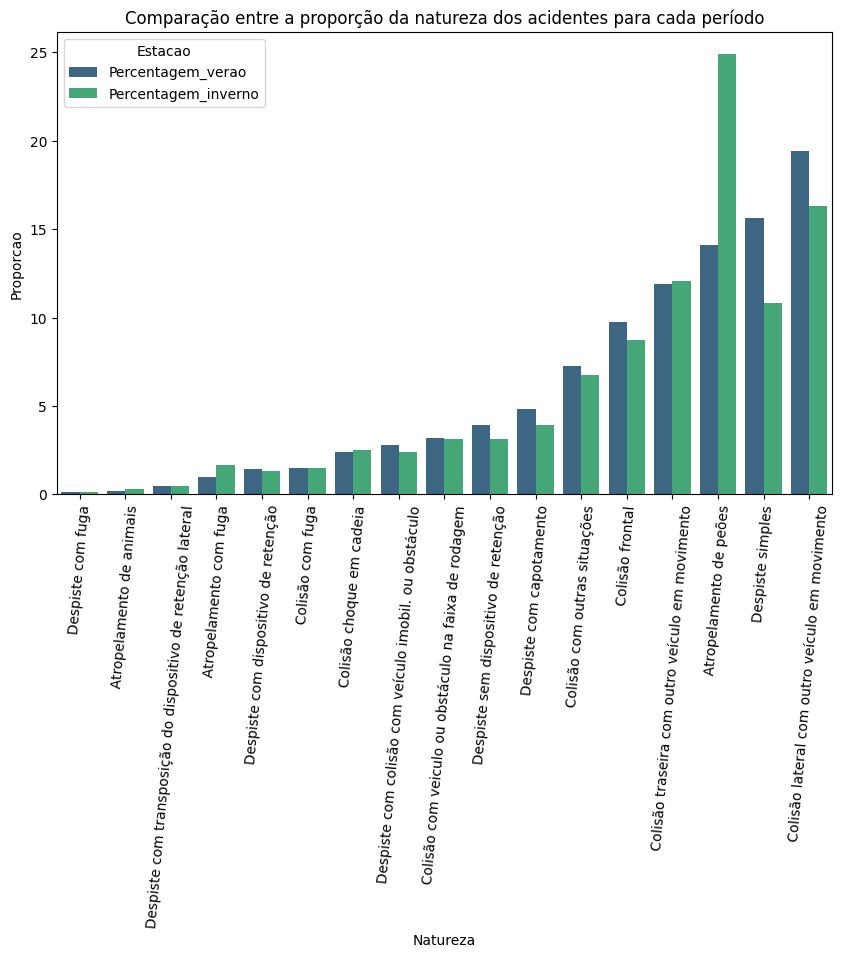

In [47]:
# gráfico da natureza 

a = acidentes_verao_inverno_natureza1721[["Natureza", "Percentagem_verao", "Percentagem_inverno"]]


df_melted = pd.melt(a, id_vars='Natureza', var_name='Estacao', value_name='Proporcao')


df_melted1 = df_melted[df_melted['Estacao'] == 'Percentagem_verao'].sort_values(by='Proporcao')
df_melted2 = df_melted[df_melted['Estacao'] == 'Percentagem_inverno']

df_melted3 = pd.concat([df_melted1, df_melted2], ignore_index = True)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Natureza', y='Proporcao', hue='Estacao', data=df_melted3, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85)

plt.title("Comparação entre a proporção da natureza dos acidentes para cada período")

In [48]:
# somente os atropelamentos de peoes nos diferentes periodos, mas nas mesmas horas

In [49]:
atropelamentos_peoes_hora_verao1721 = hora_verao1721.loc[hora_verao1721['Natureza'] == 'Atropelamento de peões']
atropelamentos_peoes_hora_inverno1721 = hora_inverno1721.loc[hora_inverno1721['Natureza'] == 'Atropelamento de peões']

In [50]:
# analisando a coluna luminosidade dentro do intervalo de hora 17 ate 21

In [51]:
atropelamentos_peoes_luminosidade_inverno1721 = atropelamentos_peoes_hora_inverno1721.groupby("Luminosidade").size().reset_index(name="Atropelamentos Inverno")
atropelamentos_peoes_luminosidade_inverno1721["Percentagem"] = round((atropelamentos_peoes_luminosidade_inverno1721["Atropelamentos Inverno"] / (atropelamentos_peoes_luminosidade_inverno1721["Atropelamentos Inverno"].sum())*100),2)  
atropelamentos_peoes_luminosidade_inverno1721 

,Luminosidade,Atropelamentos Inverno,Percentagem
0,Aurora ou crepúsculo,725,8.12
1,Em pleno dia,1488,16.66
2,"Noite, com iluminação",5841,65.41
3,"Noite, sem iluminação",802,8.98
4,NÃO DEFINIDO,22,0.25
5,Sol escandeante,52,0.58


In [52]:
atropelamentos_peoes_luminosidade_verao1721 = atropelamentos_peoes_hora_verao1721.groupby("Luminosidade").size().reset_index(name="Atropelamentos Verao")
atropelamentos_peoes_luminosidade_verao1721["Percentagem"] = round((atropelamentos_peoes_luminosidade_verao1721["Atropelamentos Verao"] / (atropelamentos_peoes_luminosidade_verao1721["Atropelamentos Verao"].sum())*100),2)
atropelamentos_peoes_luminosidade_verao1721 

,Luminosidade,Atropelamentos Verao,Percentagem
0,Aurora ou crepúsculo,450,6.01
1,Em pleno dia,5647,75.47
2,"Noite, com iluminação",971,12.98
3,"Noite, sem iluminação",151,2.02
4,NÃO DEFINIDO,31,0.41
5,Sol escandeante,232,3.10


In [53]:
# dividindo os acidentes da seguinte forma: entre as 17h e 21h, separamos os acidentes que foram considerados dias e 
# acidentes que foram considerados noite
# assim podemos estudar intervalos de horas identicos mas para diferentes luminosidade
# natureza mais afetada das 17 as 21 (dia e noite)

acidentes1721 = acidentes.loc[(acidentes['Hora cheia'] >= 17) & (acidentes['Hora cheia'] < 21)]
acidentes1721_dia = acidentes1721.loc[(acidentes1721['Luminosidade'] == 'Em pleno dia') | (acidentes1721['Luminosidade'] == 'Sol escandeante')]
acidentes1721_noite = acidentes1721.loc[(acidentes1721['Luminosidade'] == 'Noite, com iluminação') | (acidentes1721['Luminosidade'] == 'Noite, sem iluminação') | (acidentes1721['Luminosidade'] == 'Aurora ou crepúsculo')]

acidentes_dia_por_natureza1721 = acidentes1721_dia.groupby(acidentes1721_dia['Natureza']).size().reset_index(name="Acidentes_dia1721")
acidentes_noite_por_natureza1721 = acidentes1721_noite.groupby(acidentes1721_noite['Natureza']).size().reset_index(name="Acidentes_noite1721")

acidentes_dia_por_natureza1721['Percentagem_dia'] = round((acidentes_dia_por_natureza1721['Acidentes_dia1721'] / acidentes_dia_por_natureza1721['Acidentes_dia1721'].sum() * 100),2)
acidentes_noite_por_natureza1721['Percentagem_noite'] = round((acidentes_noite_por_natureza1721['Acidentes_noite1721'] / acidentes_noite_por_natureza1721['Acidentes_noite1721'].sum() * 100),2)

acidentes_dia_noite_natureza1721 = pd.merge(acidentes_dia_por_natureza1721, acidentes_noite_por_natureza1721, on='Natureza', how='inner')

acidentes_dia_noite_natureza1721["Diferença Percentagem"] = acidentes_dia_noite_natureza1721["Percentagem_noite"] - acidentes_dia_noite_natureza1721["Percentagem_dia"]

acidentes_dia_noite_natureza1721 = acidentes_dia_noite_natureza1721.sort_values(by="Diferença Percentagem", ascending=False)

acidentes_dia_noite_natureza1721

,Natureza,Acidentes_dia1721,Percentagem_dia,Acidentes_noite1721,Percentagem_noite,Diferença Percentagem
2,Atropelamento de peões,7434,14.78,9025,23.10,8.32
0,Atropelamento com fuga,539,1.07,606,1.55,0.48
4,Colisão com fuga,689,1.37,630,1.61,0.24
5,Colisão com outras situações,3508,6.97,2778,7.11,0.14
3,Colisão choque em cadeia,1196,2.38,976,2.50,0.12
1,Atropelamento de animais,100,0.20,118,0.30,0.10
12,Despiste com dispositivo de retenção,693,1.38,555,1.42,0.04
14,Despiste com transposição do dispositivo de re...,234,0.47,194,0.50,0.03
13,Despiste com fuga,78,0.16,56,0.14,-0.02
6,Colisão com veiculo ou obstáculo na faixa de r...,1609,3.20,1210,3.10,-0.10


In [54]:
# por hora

oito_dia = acidentes1721_dia.loc[(acidentes1721_dia["Datahora"].dt.hour > 19) & (acidentes1721_dia["Datahora"].dt.hour < 21)]
oito_noite = acidentes1721_noite.loc[(acidentes1721_noite["Datahora"].dt.hour > 19) & (acidentes1721_noite["Datahora"].dt.hour < 21)]
sete_dia = acidentes1721_dia.loc[(acidentes1721_dia["Datahora"].dt.hour > 18) & (acidentes1721_dia["Datahora"].dt.hour < 20)]
sete_noite = acidentes1721_noite.loc[(acidentes1721_noite["Datahora"].dt.hour > 18) & (acidentes1721_noite["Datahora"].dt.hour < 20)]
seis_dia = acidentes1721_dia.loc[(acidentes1721_dia["Datahora"].dt.hour > 17) & (acidentes1721_dia["Datahora"].dt.hour < 19)]
seis_noite = acidentes1721_noite.loc[(acidentes1721_noite["Datahora"].dt.hour > 17) & (acidentes1721_noite["Datahora"].dt.hour < 19)]
cinco_dia = acidentes1721_dia.loc[(acidentes1721_dia["Datahora"].dt.hour > 16) & (acidentes1721_dia["Datahora"].dt.hour < 18)]
cinco_noite = acidentes1721_noite.loc[(acidentes1721_noite["Datahora"].dt.hour > 16) & (acidentes1721_noite["Datahora"].dt.hour < 18)]


cinco_noite_atrop = cinco_noite.loc[cinco_noite["Natureza"] == "Atropelamento de peões"]
cinco_dia_atrop = cinco_dia.loc[cinco_dia["Natureza"] == "Atropelamento de peões"]

seis_noite_atrop = seis_noite.loc[seis_noite["Natureza"] == "Atropelamento de peões"]
seis_dia_atrop = seis_dia.loc[seis_dia["Natureza"] == "Atropelamento de peões"]

sete_noite_atrop = sete_noite.loc[sete_noite["Natureza"] == "Atropelamento de peões"]
sete_dia_atrop = sete_dia.loc[sete_dia["Natureza"] == "Atropelamento de peões"]

oito_noite_atrop = oito_noite.loc[oito_noite["Natureza"] == "Atropelamento de peões"]
oito_dia_atrop = oito_dia.loc[oito_dia["Natureza"] == "Atropelamento de peões"]

prop_cinco_noite = len(cinco_noite_atrop) / len(cinco_noite)
prop_cinco_dia = len(cinco_dia_atrop) / len(cinco_dia)

prop_seis_noite = len(seis_noite_atrop) / len(seis_noite)
prop_seis_dia = len(seis_dia_atrop) / len(seis_dia)

prop_sete_noite = len(sete_noite_atrop) / len(sete_noite)
prop_sete_dia = len(sete_dia_atrop) / len(sete_dia)

prop_oito_noite = len(oito_noite_atrop) / len(oito_noite)
prop_oito_dia = len(oito_dia_atrop) / len(oito_dia)



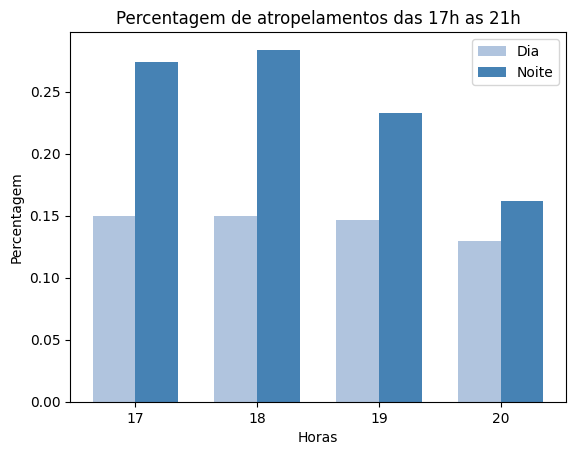

In [55]:
# grafico por hora

horas = ["17", "18", "19", "20"]
dia = [prop_cinco_dia, prop_seis_dia, prop_sete_dia, prop_oito_dia]
noite = [prop_cinco_noite, prop_seis_noite, prop_sete_noite, prop_oito_noite]

largura_barra = 0.35

posicoes_dia = np.arange(len(horas))
posicoes_noite = [x + largura_barra for x in posicoes_dia]

bar1 = plt.bar(posicoes_dia, dia, largura_barra, label='Dia', color='lightsteelblue')
bar2 = plt.bar(posicoes_noite, noite, largura_barra, label='Noite', color='steelblue' )

plt.xlabel('Horas')
plt.ylabel('Percentagem')
plt.title('Percentagem de atropelamentos das 17h as 21h')
plt.xticks(posicoes_dia + largura_barra/2, horas) 
plt.legend()


<BarContainer object of 12 artists>

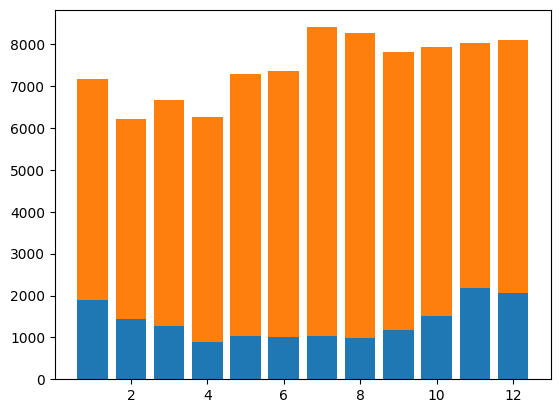

In [56]:
# por mes, de 17 as 21 

acidentes1721_janeiro = acidentes1721.loc[acidentes1721["Datahora"].dt.month == 1]
acidentes1721_janeiro_atrop = acidentes1721_janeiro.loc[acidentes1721_janeiro["Natureza"] == "Atropelamento de peões"]

acidentes1721_fevereiro = acidentes1721.loc[acidentes1721["Datahora"].dt.month == 2]
acidentes1721_fevereiro_atrop = acidentes1721_fevereiro.loc[acidentes1721_fevereiro["Natureza"] == "Atropelamento de peões"]

acidentes1721_marco = acidentes1721.loc[acidentes1721["Datahora"].dt.month == 3]
acidentes1721_marco_atrop = acidentes1721_marco.loc[acidentes1721_marco["Natureza"] == "Atropelamento de peões"]

acidentes1721_abril = (acidentes1721.loc[acidentes1721["Datahora"].dt.month == 4])
acidentes1721_abril_atrop = (acidentes1721_abril.loc[acidentes1721_abril["Natureza"] == "Atropelamento de peões"])

acidentes1721_maio = (acidentes1721.loc[acidentes1721["Datahora"].dt.month == 5])
acidentes1721_maio_atrop = (acidentes1721_maio.loc[acidentes1721_maio["Natureza"] == "Atropelamento de peões"])

acidentes1721_junho = (acidentes1721.loc[acidentes1721["Datahora"].dt.month == 6])
acidentes1721_junho_atrop = (acidentes1721_junho.loc[acidentes1721_junho["Natureza"] == "Atropelamento de peões"])

acidentes1721_julho = (acidentes1721.loc[acidentes1721["Datahora"].dt.month == 7])
acidentes1721_julho_atrop = (acidentes1721_julho.loc[acidentes1721_julho["Natureza"] == "Atropelamento de peões"])

acidentes1721_agosto = (acidentes1721.loc[acidentes1721["Datahora"].dt.month == 8])
acidentes1721_agosto_atrop = (acidentes1721_agosto.loc[acidentes1721_agosto["Natureza"] == "Atropelamento de peões"])

acidentes1721_setembro = (acidentes1721.loc[acidentes1721["Datahora"].dt.month == 9])
acidentes1721_setembro_atrop = (acidentes1721_setembro.loc[acidentes1721_setembro["Natureza"] == "Atropelamento de peões"])

acidentes1721_outubro = (acidentes1721.loc[acidentes1721["Datahora"].dt.month == 10])
acidentes1721_outubro_atrop = (acidentes1721_outubro.loc[acidentes1721_outubro["Natureza"] == "Atropelamento de peões"])

acidentes1721_novembro = (acidentes1721.loc[acidentes1721["Datahora"].dt.month == 11])
acidentes1721_novembro_atrop = (acidentes1721_novembro.loc[acidentes1721_novembro["Natureza"] == "Atropelamento de peões"])

acidentes1721_dezembro = (acidentes1721.loc[acidentes1721["Datahora"].dt.month == 12])
acidentes1721_dezembro_atrop = (acidentes1721_dezembro.loc[acidentes1721_dezembro["Natureza"] == "Atropelamento de peões"])

meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


quantidade_total_meses = [acidentes1721_janeiro, acidentes1721_fevereiro, acidentes1721_marco, acidentes1721_abril, 
                          acidentes1721_maio, acidentes1721_junho, acidentes1721_julho, acidentes1721_agosto,
                         acidentes1721_setembro, acidentes1721_outubro, acidentes1721_novembro, acidentes1721_dezembro]

quantidade_atrop_meses = [acidentes1721_janeiro_atrop, acidentes1721_fevereiro_atrop, acidentes1721_marco_atrop, acidentes1721_abril_atrop,
                         acidentes1721_maio_atrop, acidentes1721_junho_atrop, acidentes1721_julho_atrop, acidentes1721_agosto_atrop, 
                         acidentes1721_setembro_atrop, acidentes1721_outubro_atrop, acidentes1721_novembro_atrop, acidentes1721_dezembro_atrop]

lista_quantidade = np.array([])

for acidentes_ in quantidade_total_meses:
    quantidade = len(acidentes_)
    lista_quantidade = np.append(lista_quantidade, quantidade)

lista_quantidade_atrop = np.array([])

for atropelamentos in quantidade_atrop_meses:
    quantidade = len(atropelamentos)
    lista_quantidade_atrop = np.append(lista_quantidade_atrop, quantidade)

lista_quantidade_ = np.array([])

lista_quantidade_ = lista_quantidade - lista_quantidade_atrop

fig, ax = plt.subplots()

ax.bar(meses, lista_quantidade_atrop, label='Total de Acidentes')
ax.bar(meses, lista_quantidade_, label='Atropelamentos', bottom=lista_quantidade_atrop)

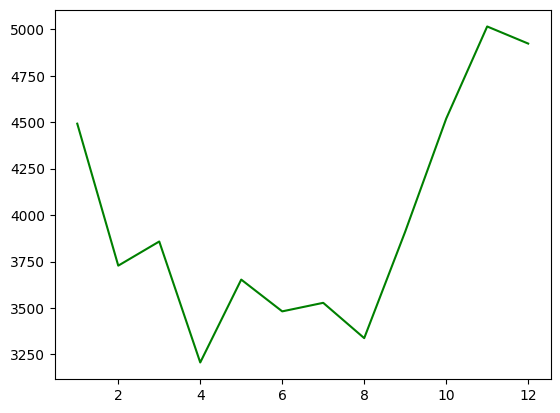

In [57]:
# grafico da evolucao do atropelamento de peoes por mes

atropelamento_peoes = acidentes.loc[acidentes['Natureza'] == 'Atropelamento de peões']

atropelamento_peoes_por_mes = atropelamento_peoes.groupby(atropelamento_peoes["Datahora"].dt.month).size().reset_index(name='Atropelamento_de_peoes')

array1 = np.array(atropelamento_peoes_por_mes['Datahora'])
array2 = np.array(atropelamento_peoes_por_mes['Atropelamento_de_peoes'])


plt.plot(array1, array2, linestyle='-', color='green')

In [58]:
# Observando se há essa mudança em todos os distritos 

atropelamentos_peoes_dia1721 = acidentes1721_dia.loc[acidentes1721_dia['Natureza'] == 'Atropelamento de peões']
atropelamentos_peoes_noite1721 = acidentes1721_noite.loc[acidentes1721_noite['Natureza'] == 'Atropelamento de peões']

atropelamentos_por_distrito1721_noite = atropelamentos_peoes_noite1721.groupby('Distrito').size().reset_index(name='Atropelamentos_noite1721')
acidentes_por_distrito1721_noite = acidentes1721_noite.groupby('Distrito').size().reset_index(name='Acidentes_noite1721')

atropelamentos_por_distrito1721_noite_perc = pd.merge(atropelamentos_por_distrito1721_noite , acidentes_por_distrito1721_noite, on='Distrito', how='inner')
atropelamentos_por_distrito1721_noite_perc['Percentagem_noite'] = round((atropelamentos_por_distrito1721_noite_perc['Atropelamentos_noite1721'] / atropelamentos_por_distrito1721_noite_perc['Acidentes_noite1721'] * 100),2)  

atropelamentos_por_distrito1721_dia = atropelamentos_peoes_dia1721.groupby('Distrito').size().reset_index(name='Atropelamentos_dia1721')
acidentes_por_distrito1721_dia = acidentes1721_dia.groupby('Distrito').size().reset_index(name='Acidentes_dia1721')

atropelamentos_por_distrito1721_dia_perc = pd.merge(atropelamentos_por_distrito1721_dia , acidentes_por_distrito1721_dia, on='Distrito', how='inner')
atropelamentos_por_distrito1721_dia_perc['Percentagem_dia'] = round((atropelamentos_por_distrito1721_dia_perc['Atropelamentos_dia1721'] / atropelamentos_por_distrito1721_dia_perc['Acidentes_dia1721'] * 100),2)

atropelamentos_por_distrito_dia_noite = pd.merge(atropelamentos_por_distrito1721_noite_perc, atropelamentos_por_distrito1721_dia_perc, on='Distrito', how='inner')
atropelamentos_por_distrito_dia_noite['Diferenca_perc'] = atropelamentos_por_distrito_dia_noite['Percentagem_noite'] - atropelamentos_por_distrito_dia_noite['Percentagem_dia']

atropelamentos_por_distrito_dia_noite = atropelamentos_por_distrito_dia_noite.sort_values(by='Diferenca_perc', ascending = False)
atropelamentos_por_distrito_dia_noite = atropelamentos_por_distrito_dia_noite.loc[(atropelamentos_por_distrito_dia_noite['Acidentes_noite1721'] > 50)
                                            & (atropelamentos_por_distrito_dia_noite['Acidentes_dia1721'] > 50)]

atropelamentos_por_distrito_dia_noite

,Distrito,Atropelamentos_noite1721,Acidentes_noite1721,Percentagem_noite,Atropelamentos_dia1721,Acidentes_dia1721,Percentagem_dia,Diferenca_perc
2,Braga,978,3572,27.38,558,4453,12.53,14.85
15,Vila Real,172,647,26.58,109,929,11.73,14.85
3,Bragança,100,417,23.98,71,597,11.89,12.09
14,Viana do Castelo,187,886,21.11,122,1258,9.70,11.41
11,Porto,1975,7154,27.61,1462,8150,17.94,9.67
0,Aveiro,602,3102,19.41,421,3956,10.64,8.77
16,Viseu,245,1346,18.20,213,2030,10.49,7.71
13,Setúbal,666,2706,24.61,645,3807,16.94,7.67
8,Leiria,362,2126,17.03,295,2957,9.98,7.05
17,Évora,82,509,16.11,63,677,9.31,6.80


C:\Users\dougl\AppData\Local\Temp\ipykernel_1140\2263179896.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=85)


Text(0.5, 1.0, 'Proporção de atropelamentos em relação aos acidentes totais por Distrito entre as 17h-21h')

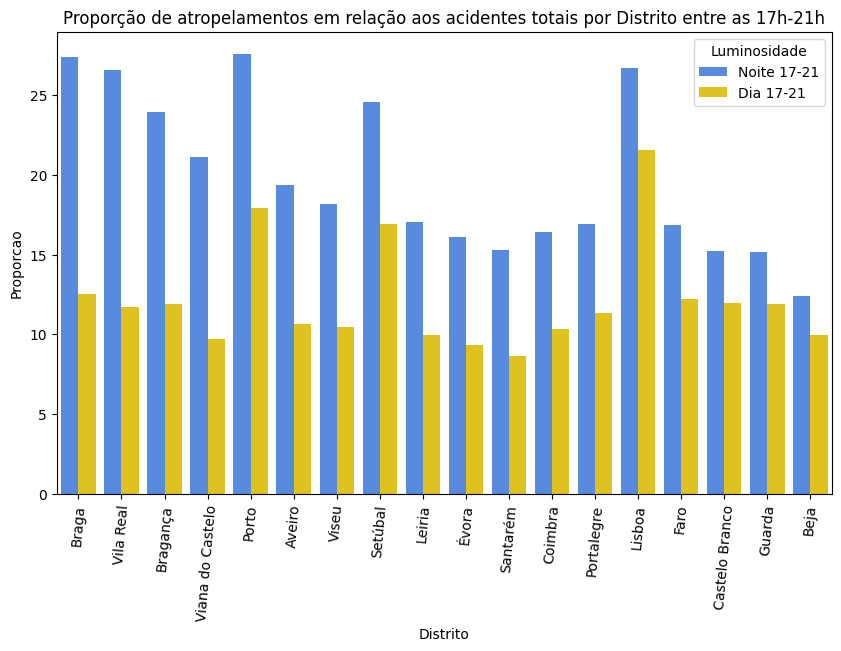

In [59]:
# gráfico atropelamento por distritos

b = atropelamentos_por_distrito_dia_noite[["Distrito", "Percentagem_noite", "Percentagem_dia"]]
b.columns = ["Distrito", "Noite 17-21", "Dia 17-21"]
derretido = pd.melt(b, id_vars='Distrito', var_name='Luminosidade', value_name='Proporcao')

derretido1 = derretido[derretido["Luminosidade"] == "Noite 17-21"]
derretido2 = derretido[derretido["Luminosidade"] == "Dia 17-21"]


derretidos3 = pd.concat([derretido1, derretido2], ignore_index = True)

cores = ["#4285F4", "#FFD700"]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Distrito', y='Proporcao', hue='Luminosidade', data=derretidos3, palette=cores, orient='v')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85)

plt.title("Proporção de atropelamentos em relação aos acidentes totais por Distrito entre as 17h-21h")

In [60]:
# Agora em todos os concelhos

atropelamentos_por_Concelho1721_noite = atropelamentos_peoes_noite1721.groupby('Concelho').size().reset_index(name='Atropelamentos_noite1721')
acidentes_por_Concelho1721_noite = acidentes1721_noite.groupby('Concelho').size().reset_index(name='Acidentes_noite1721')

atropelamentos_por_Concelho1721_noite_perc = pd.merge(atropelamentos_por_Concelho1721_noite , acidentes_por_Concelho1721_noite, on='Concelho', how='inner')
atropelamentos_por_Concelho1721_noite_perc['Percentagem_noite'] = round((atropelamentos_por_Concelho1721_noite_perc['Atropelamentos_noite1721'] / atropelamentos_por_Concelho1721_noite_perc['Acidentes_noite1721'] * 100),2)  

atropelamentos_por_Concelho1721_dia = atropelamentos_peoes_dia1721.groupby('Concelho').size().reset_index(name='Atropelamentos_dia1721')
acidentes_por_Concelho1721_dia = acidentes1721_dia.groupby('Concelho').size().reset_index(name='Acidentes_dia1721')

atropelamentos_por_Concelho1721_dia_perc = pd.merge(atropelamentos_por_Concelho1721_dia , acidentes_por_Concelho1721_dia, on='Concelho', how='inner')
atropelamentos_por_Concelho1721_dia_perc['Percentagem_dia'] = round((atropelamentos_por_Concelho1721_dia_perc['Atropelamentos_dia1721'] / atropelamentos_por_Concelho1721_dia_perc['Acidentes_dia1721'] * 100),2)

atropelamentos_por_Concelho_dia_noite = pd.merge(atropelamentos_por_Concelho1721_noite_perc, atropelamentos_por_Concelho1721_dia_perc, on='Concelho', how='inner')
atropelamentos_por_Concelho_dia_noite['Diferenca_perc'] = atropelamentos_por_Concelho_dia_noite['Percentagem_noite'] - atropelamentos_por_Concelho_dia_noite['Percentagem_dia']

atropelamentos_por_Concelho_dia_noite = atropelamentos_por_Concelho_dia_noite.sort_values(by='Diferenca_perc', ascending = False)
atropelamentos_por_Concelho_dia_noite = atropelamentos_por_Concelho_dia_noite.loc[(atropelamentos_por_Concelho_dia_noite['Acidentes_noite1721'] > 500)
                                            & (atropelamentos_por_Concelho_dia_noite['Acidentes_dia1721'] > 500)]

atropelamentos_por_Concelho_dia_noite.head(15)

,Concelho,Atropelamentos_noite1721,Acidentes_noite1721,Percentagem_noite,Atropelamentos_dia1721,Acidentes_dia1721,Percentagem_dia,Diferenca_perc
93,Gondomar,238,582,40.89,122,542,22.51,18.38
42,Braga,280,786,35.62,153,864,17.71,17.91
97,Guimaraes,232,692,33.53,121,767,15.78,17.75
235,Vila Nova de Famalicao,146,626,23.32,77,737,10.45,12.87
117,Matosinhos,212,636,33.33,150,723,20.75,12.58
145,Odivelas,204,554,36.82,129,529,24.39,12.43
199,Seixal,153,513,29.82,124,661,18.76,11.06
187,Santa Maria da Feira,128,598,21.40,74,662,11.18,10.22
103,Leiria,126,653,19.30,78,823,9.48,9.82
66,Coimbra,166,680,24.41,115,738,15.58,8.83


In [61]:
# separando os top 5

acidentes1721_top5_dia = acidentes1721_dia.loc[(acidentes1721_dia["Distrito"] == "Braga")
                                       |(acidentes1721_dia["Distrito"] == "Vila Real")
                                       |(acidentes1721_dia["Distrito"] == "Bragança")
                                       |(acidentes1721_dia["Distrito"] == "Viana do Castelo")
                                        |(acidentes1721_dia["Distrito"] == 'Porto')]

acidentes1721_top5_noite = acidentes1721_noite.loc[(acidentes1721_noite["Distrito"] == "Braga")
                                       |(acidentes1721_noite["Distrito"] == "Vila Real")
                                       |(acidentes1721_noite["Distrito"] == "Bragança")
                                       |(acidentes1721_noite["Distrito"] == "Viana do Castelo")
                                        |(acidentes1721_noite["Distrito"] == 'Porto')]

atropelamentos1721_top5_dia = acidentes1721_top5_dia.loc[acidentes1721_top5_dia["Natureza"] == "Atropelamento de peões"]
atropelamentos1721_top5_noite = acidentes1721_top5_noite.loc[acidentes1721_top5_noite["Natureza"] == "Atropelamento de peões"]

dropar = ['Entidades Fiscalizadoras','Km','Cod Via','Latitude GPS','Longitude GPS','Dia','Mês','Hora','Hora cheia', 'Obstáculos', 'Pov. Proxima', 'Obras Arte', 'Sentidos']

atropelamentos1721_top5_dia_ = atropelamentos1721_top5_dia.drop(dropar, axis=1)
atropelamentos1721_top5_noite_ = atropelamentos1721_top5_noite.drop(dropar, axis=1)

In [62]:
# Se fosse exclusivamente por conta da luminosidade, todos os distritos do territorio deveriam apresentar aumento mais ou menos parecido, 
# ja que todos escurecem praticamente no mesmo horario (diferença de 15 minutos entre o sul e norte)

# Analisando possiveis motivos para alem da luminosidade:

In [63]:
# Chuva e Bom tempo

colunas = ["Id. Acidente", "Acções Peão"]
peoes_acoes = peoes[colunas]

top5_dia_com_acoes_peoes = pd.merge(atropelamentos1721_top5_dia_, peoes_acoes, on = "Id. Acidente", how = "inner")
top5_noite_com_acoes_peoes = pd.merge(atropelamentos1721_top5_noite_, peoes_acoes, on = "Id. Acidente", how = "inner")

top5_dia_por_clima = top5_dia_com_acoes_peoes.groupby(top5_dia_com_acoes_peoes["Factores Atmosféricos"]).size().reset_index(name="Atropelamentos")
top5_noite_por_clima = top5_noite_com_acoes_peoes.groupby(top5_noite_com_acoes_peoes["Factores Atmosféricos"]).size().reset_index(name="Atropelamentos")

# Aderencia do piso 

top5_dia_por_piso = top5_dia_com_acoes_peoes.groupby(top5_dia_com_acoes_peoes["Cond Aderência"]).size().reset_index(name="Atropelamentos")
top5_noite_por_piso = top5_noite_com_acoes_peoes.groupby(top5_noite_com_acoes_peoes["Cond Aderência"]).size().reset_index(name="Atropelamentos")

# Marcas de transito na Via

top5_dia_por_MarcaVia = top5_dia_com_acoes_peoes.groupby(top5_dia_com_acoes_peoes["Marca Via"]).size().reset_index(name="Atropelamentos")
top5_noite_por_MarcaVia = top5_noite_com_acoes_peoes.groupby(top5_noite_com_acoes_peoes["Marca Via"]).size().reset_index(name="Atropelamentos")

# Passagem de peoes

top5_dia_por_Sinais = top5_dia_com_acoes_peoes.groupby(top5_dia_com_acoes_peoes["Sinais"]).size().reset_index(name="Atropelamentos")
top5_noite_por_Sinais = top5_noite_com_acoes_peoes.groupby(top5_noite_com_acoes_peoes["Sinais"]).size().reset_index(name="Atropelamentos")

# Reta ou Curva

top5_dia_por_rc = top5_dia_com_acoes_peoes.groupby(top5_dia_com_acoes_peoes["Traçado 1"]).size().reset_index(name="Atropelamentos")
top5_noite_por_rc = top5_noite_com_acoes_peoes.groupby(top5_noite_com_acoes_peoes["Traçado 1"]).size().reset_index(name="Atropelamentos")

# Açao do peao 

top5_dia_por_acao = top5_dia_com_acoes_peoes.groupby(top5_dia_com_acoes_peoes["Acções Peão"]).size().reset_index(name="Atropelamentos")
top5_noite_por_acao = top5_noite_com_acoes_peoes.groupby(top5_noite_com_acoes_peoes["Acções Peão"]).size().reset_index(name="Atropelamentos")

# Localidades

top5_dia_por_localizacao = top5_dia_com_acoes_peoes.groupby(top5_dia_com_acoes_peoes["Localizações"]).size().reset_index(name="Atropelamentos")
top5_noite_por_localizacao = top5_noite_com_acoes_peoes.groupby(top5_noite_com_acoes_peoes["Localizações"]).size().reset_index(name="Atropelamentos")

# Sinais Luminosos

top5_dia_por_luminosos = top5_dia_com_acoes_peoes.groupby(top5_dia_com_acoes_peoes["Sinais Luminosos"]).size().reset_index(name="Atropelamentos")
top5_noite_por_luminosos = top5_noite_com_acoes_peoes.groupby(top5_noite_com_acoes_peoes["Sinais Luminosos"]).size().reset_index(name="Atropelamentos")

In [64]:
# juntando todos os dados de noite

data_noite = {
    'Na Chuva': top5_noite_por_clima.loc[1, 'Atropelamentos'],
    'Bom tempo': top5_noite_por_clima.loc[0, 'Atropelamentos'],
    'Molhado': top5_noite_por_piso.loc[4, 'Atropelamentos'] + top5_noite_por_piso.loc[3, 'Atropelamentos'] + top5_noite_por_piso.loc[2, 'Atropelamentos'],
    'Seco': top5_noite_por_piso.loc[6, 'Atropelamentos'],
    'Com marca': top5_noite_por_MarcaVia.loc[0, 'Atropelamentos'] + top5_noite_por_MarcaVia.loc[1, 'Atropelamentos'],
    'Sem marca': top5_noite_por_MarcaVia.loc[3, 'Atropelamentos'],
    'Com sinal': top5_noite_por_Sinais.loc[3, 'Atropelamentos'],
    'Sem sinal': top5_noite_por_Sinais['Atropelamentos'].sum() - top5_noite_por_Sinais.loc[3, 'Atropelamentos'],
    'Atravessando passadeira': top5_noite_por_acao.loc[1, 'Atropelamentos'],
    'Outra situacao': top5_noite_por_acao['Atropelamentos'].sum() - top5_noite_por_acao.loc[1, 'Atropelamentos'],
    'Curva': top5_noite_por_rc.loc[0, 'Atropelamentos'],
    'Reta': top5_noite_por_rc.loc[2, 'Atropelamentos'],
    'Dentro de Localidades': top5_noite_por_localizacao.loc[0, 'Atropelamentos'],
    'Fora de Localidades': top5_noite_por_localizacao.loc[1, 'Atropelamentos'],
    'Inexistentes/Desligados': top5_noite_por_luminosos.loc[1, 'Atropelamentos'] + top5_noite_por_luminosos.loc[2, 'Atropelamentos'],
    'A funcionar': top5_noite_por_luminosos.loc[0, 'Atropelamentos'] + top5_noite_por_luminosos.loc[3, 'Atropelamentos']
}

dados_top5_noite = pd.DataFrame(data_noite, index=['Atropelamentos Noite'])
dados_top5_noite = dados_top5_noite.T

dados_top5_noite['Atropelamentos Noite %'] = (dados_top5_noite['Atropelamentos Noite'] / len(top5_noite_com_acoes_peoes)) * 100
dados_top5_noite = dados_top5_noite.round(0).astype(int).astype(str)
dados_top5_noite = dados_top5_noite.T

# juntando todos os dados dia

data_dia = {
    'Na Chuva': top5_dia_por_clima.loc[1, 'Atropelamentos'],
    'Bom tempo': top5_dia_por_clima.loc[0, 'Atropelamentos'],
    'Molhado': top5_dia_por_piso.loc[1, 'Atropelamentos'] + top5_dia_por_piso.loc[2, 'Atropelamentos'],
    'Seco': top5_dia_por_piso.loc[4, 'Atropelamentos'],
    'Com marca': top5_dia_por_MarcaVia.loc[0, 'Atropelamentos'] + top5_dia_por_MarcaVia.loc[1, 'Atropelamentos'],
    'Sem marca': top5_dia_por_MarcaVia.loc[3, 'Atropelamentos'],
    'Com sinal': top5_dia_por_Sinais.loc[3, 'Atropelamentos'],
    'Sem sinal': top5_dia_por_Sinais['Atropelamentos'].sum() - top5_dia_por_Sinais.loc[3, 'Atropelamentos'],
    'Atravessando passadeira': top5_dia_por_acao.loc[1, 'Atropelamentos'],
    'Outra situacao': top5_dia_por_acao['Atropelamentos'].sum() - top5_dia_por_acao.loc[1, 'Atropelamentos'],
    'Curva': top5_dia_por_rc.loc[0, 'Atropelamentos'],
    'Reta': top5_dia_por_rc.loc[2, 'Atropelamentos'],
    'Dentro de Localidades': top5_dia_por_localizacao.loc[0, 'Atropelamentos'],
    'Fora de Localidades': top5_dia_por_localizacao.loc[1, 'Atropelamentos'],
    'Inexistentes/Desligados': top5_dia_por_luminosos.loc[1, 'Atropelamentos'] + top5_dia_por_luminosos.loc[2, 'Atropelamentos'],
    'A funcionar': top5_dia_por_luminosos.loc[0, 'Atropelamentos'] + top5_dia_por_luminosos.loc[3, 'Atropelamentos']
}

dados_top5_dia = pd.DataFrame(data_dia, index=['Atropelamentos Dia'])
dados_top5_dia = dados_top5_dia.T

dados_top5_dia['Atropelamentos Dia %'] = (dados_top5_dia['Atropelamentos Dia'] / len(top5_dia_com_acoes_peoes)) * 100
dados_top5_dia = dados_top5_dia.round(0).astype(int).astype(str)
dados_top5_dia = dados_top5_dia.T

#criando tabela multindex

categorias_atmosfericas = ['Na Chuva', 'Bom tempo']
categorias_piso = ['Molhado', 'Seco']
categorias_marcas = ['Com marca', 'Sem marca']
categorias_sinal = ['Com sinal', 'Sem sinal']
categorias_acao = ['Atravessando passadeira', 'Outra situacao']
categorias_rc = ['Curva', 'Reta']
categorias_localidade = ['Dentro de Localidades', 'Fora de Localidades']
categorias_luminosos = ['Inexistentes/Desligados', 'A funcionar']

colunas_atmosfericas = [('Fatores Atmosféricos', cat) for cat in categorias_atmosfericas]
colunas_piso = [('Aderencia', cat) for cat in categorias_piso]
colunas_marcas = [('Marcas na via', cat) for cat in categorias_marcas]
colunas_sinal = [('Passadeira', cat) for cat in categorias_sinal]
colunas_acao = [('Acao peao', cat) for cat in categorias_acao]
colunas_localidade = [('Localidade', cat) for cat in categorias_localidade]
colunas_luminosos = [('Sinais Luminosos', cat) for cat in categorias_luminosos]
colunas_rc = [('Reta ou Curva', cat) for cat in categorias_rc]


colunas = colunas_atmosfericas + colunas_piso + colunas_marcas + colunas_sinal + colunas_acao + colunas_rc + colunas_localidade + colunas_luminosos

dados_top5_noite.columns = pd.MultiIndex.from_tuples(colunas)
dados_top5_dia.columns = pd.MultiIndex.from_tuples(colunas)
dados_top5_noite = dados_top5_noite.T
dados_top5_dia = dados_top5_dia.T

dados_top5_noite_dia = pd.concat([dados_top5_dia, dados_top5_noite], axis=1)
dados_top5_noite_dia

Atropelamentos Dia  \
Fatores Atmosféricos Na Chuva                               253   
                     Bom tempo                             2181   
Aderencia            Molhado                                386   
                     Seco                                  2044   
Marcas na via        Com marca                             1462   
                     Sem marca                              968   
Passadeira           Com sinal                              781   
                     Sem sinal                             1659   
Acao peao            Atravessando passadeira                994   
                     Outra situacao                        1446   
Reta ou Curva        Curva                                  393   
                     Reta                                  2042   
Localidade           Dentro de Localidades                 2416   
                     Fora de Localidades                     24   
Sinais Luminosos     Inexistentes/Desligados               2185   
                     A funcionar                            222   

                                             Atropelamentos Dia %  \
Fatores Atmosféricos Na Chuva                                  10   
                     Bom tempo                                 89   
Aderencia            Molhado                                   16   
                     Seco                                      84   
Marcas na via        Com marca                                 60   
                     Sem marca                                 40   
Passadeira           Com sinal                                 32   
                     Sem sinal                                 68   
Acao peao            Atravessando passadeira                   41   
                     Outra situacao                            59   
Reta ou Curva        Curva                                     16   
                     Reta                                      84   
Localidade           Dentro de Localidades                     99   
                     Fora de Localidades                        1   
Sinais Luminosos     Inexistentes/Desligados                   90   
                     A funcionar                                9   

                                             Atropelamentos Noite  \
Fatores Atmosféricos Na Chuva                                1571   
                     Bom tempo                               2025   
Aderencia            Molhado                                 1649   
                     Seco                                    1952   
Marcas na via        Com marca                               2596   
                     Sem marca                                997   
Passadeira           Com sinal                               1660   
                     Sem sinal                               1950   
Acao peao            Atravessando passadeira                 1997   
                     Outra situacao                          1613   
Reta ou Curva        Curva                                    514   
                     Reta                                    3091   
Localidade           Dentro de Localidades                   3564   
                     Fora de Localidades                       46   
Sinais Luminosos     Inexistentes/Desligados                 3274   
                     A funcionar                              293   

                                             Atropelamentos Noite %  
Fatores Atmosféricos Na Chuva                                    44  
                     Bom tempo                                   56  
Aderencia            Molhado                                     46  
                     Seco                                        54  
Marcas na via        Com marca                                   72  
                     Sem marca                                   28  
Passadeira           Com sinal                                   46

Text(0.5, 1.0, 'Percentagem de atropelamentos para cada situação entre as 17h e 21h')

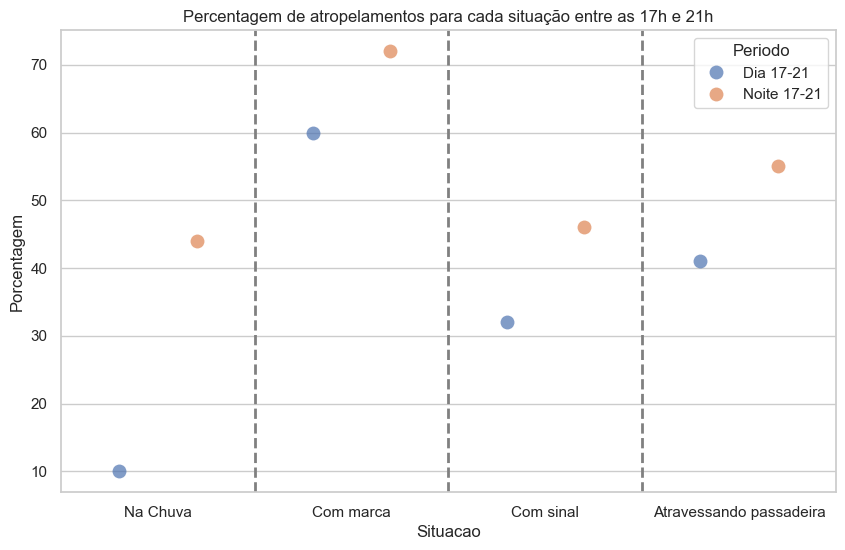

In [65]:
# gráfico caracteristicas dos atropelamentos top5 distritos


bora = dados_top5_noite_dia[["Atropelamentos Dia %", "Atropelamentos Noite %"]]
bora_reset = bora.reset_index()
bora_reset = bora_reset.drop("level_0", axis=1)
bora_reset.rename(columns={'level_1': 'Situacao'}, inplace=True)
bora_reset.rename(columns={'Atropelamentos Dia %': 'Dia 17-21'}, inplace=True)
bora_reset.rename(columns={'Atropelamentos Noite %': 'Noite 17-21'}, inplace=True)
situacao = ["Na Chuva", "Com marca", "Com sinal", "Atravessando passadeira"]
bora_reset = bora_reset.loc[bora_reset['Situacao'].isin(situacao)]


bora_reset['Dia 17-21'] = pd.to_numeric(bora_reset['Dia 17-21'])
bora_reset['Noite 17-21'] = pd.to_numeric(bora_reset['Noite 17-21'])


bora_melt = pd.melt(bora_reset, id_vars='Situacao', var_name='Periodo', value_name='Porcentagem')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.stripplot(x='Situacao', y='Porcentagem', hue='Periodo', data=bora_melt, jitter=True, dodge=True, marker='o', alpha=0.7, size=10)


for i, situacao in enumerate(bora_melt['Situacao'].unique()):
    if i > 0:
        plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=2)

plt.title("Percentagem de atropelamentos para cada situação entre as 17h e 21h")

In [66]:
# Mesma comparaçao com os 5 menores, para ver se as variaveis se comportam de forma parecida ou diferente 
# (diferente é o esperado)

In [67]:
# separando os ultimos 5

acidentes1721_ultimos5_dia = acidentes1721_dia.loc[(acidentes1721_dia["Distrito"] == "Beja")
                                       |(acidentes1721_dia["Distrito"] == "Guarda")
                                       |(acidentes1721_dia["Distrito"] == "Castelo Branco")
                                       |(acidentes1721_dia["Distrito"] == "Faro") | (acidentes1721_dia["Distrito"] == "Lisboa")]

acidentes1721_ultimos5_noite = acidentes1721_noite.loc[(acidentes1721_noite["Distrito"] == "Beja")
                                       |(acidentes1721_noite["Distrito"] == "Guarda")
                                       |(acidentes1721_noite["Distrito"] == "Castelo Branco")
                                       |(acidentes1721_noite["Distrito"] == "Faro") | (acidentes1721_noite["Distrito"] == "Lisboa") ]

atropelamentos1721_ultimos5_dia = acidentes1721_ultimos5_dia.loc[acidentes1721_ultimos5_dia["Natureza"] == "Atropelamento de peões"]
atropelamentos1721_ultimos5_noite = acidentes1721_ultimos5_noite.loc[acidentes1721_ultimos5_noite["Natureza"] == "Atropelamento de peões"]

dropar = ['Entidades Fiscalizadoras','Km','Cod Via','Latitude GPS','Longitude GPS','Dia','Mês','Hora','Hora cheia', 'Obstáculos', 'Pov. Proxima', 'Obras Arte', 'Sentidos']

atropelamentos1721_ultimos5_dia_ = atropelamentos1721_ultimos5_dia.drop(dropar, axis=1)
atropelamentos1721_ultimos5_noite_ = atropelamentos1721_ultimos5_noite.drop(dropar, axis=1)

In [68]:
# Chuva e bom tempo

ultimos5_dia_com_acoes_peoes = pd.merge(atropelamentos1721_ultimos5_dia_, peoes_acoes, on = "Id. Acidente", how = "inner")
ultimos5_noite_com_acoes_peoes = pd.merge(atropelamentos1721_ultimos5_noite_, peoes_acoes, on = "Id. Acidente", how = "inner")

ultimos5_dia_por_clima = ultimos5_dia_com_acoes_peoes.groupby(ultimos5_dia_com_acoes_peoes["Factores Atmosféricos"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_clima = ultimos5_noite_com_acoes_peoes.groupby(ultimos5_noite_com_acoes_peoes["Factores Atmosféricos"]).size().reset_index(name="Atropelamentos")

# Aderencia do piso

ultimos5_dia_por_piso = ultimos5_dia_com_acoes_peoes.groupby(ultimos5_dia_com_acoes_peoes["Cond Aderência"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_piso = ultimos5_noite_com_acoes_peoes.groupby(ultimos5_noite_com_acoes_peoes["Cond Aderência"]).size().reset_index(name="Atropelamentos")

# Marca nas via de transito

ultimos5_dia_por_MarcaVia = ultimos5_dia_com_acoes_peoes.groupby(ultimos5_dia_com_acoes_peoes["Marca Via"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_MarcaVia = ultimos5_noite_com_acoes_peoes.groupby(ultimos5_noite_com_acoes_peoes["Marca Via"]).size().reset_index(name="Atropelamentos")

# Passagem de peoes

ultimos5_dia_por_Sinais = ultimos5_dia_com_acoes_peoes.groupby(ultimos5_dia_com_acoes_peoes["Sinais"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_Sinais = ultimos5_noite_com_acoes_peoes.groupby(ultimos5_noite_com_acoes_peoes["Sinais"]).size().reset_index(name="Atropelamentos")

# Reta ou curva

ultimos5_dia_por_rc = ultimos5_dia_com_acoes_peoes.groupby(ultimos5_dia_com_acoes_peoes["Traçado 1"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_rc = ultimos5_noite_com_acoes_peoes.groupby(ultimos5_noite_com_acoes_peoes["Traçado 1"]).size().reset_index(name="Atropelamentos")

# Acao do peao

ultimos5_dia_por_acao = ultimos5_dia_com_acoes_peoes.groupby(ultimos5_dia_com_acoes_peoes["Acções Peão"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_acao = ultimos5_noite_com_acoes_peoes.groupby(ultimos5_noite_com_acoes_peoes["Acções Peão"]).size().reset_index(name="Atropelamentos")

# Localidades

ultimos5_dia_por_localizacao = ultimos5_dia_com_acoes_peoes.groupby(ultimos5_dia_com_acoes_peoes["Localizações"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_localizacao = ultimos5_noite_com_acoes_peoes.groupby(ultimos5_noite_com_acoes_peoes["Localizações"]).size().reset_index(name="Atropelamentos")

# Sinais Luminosos

ultimos5_dia_por_luminosos = ultimos5_dia_com_acoes_peoes.groupby(ultimos5_dia_com_acoes_peoes["Sinais Luminosos"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_luminosos = ultimos5_noite_com_acoes_peoes.groupby(ultimos5_noite_com_acoes_peoes["Sinais Luminosos"]).size().reset_index(name="Atropelamentos")

In [69]:
# juntando todos os dados de noite

data_noite = {
    'Na Chuva': ultimos5_noite_por_clima.loc[1, 'Atropelamentos'],
    'Bom tempo': ultimos5_noite_por_clima.loc[0, 'Atropelamentos'],
    'Molhado': ultimos5_noite_por_piso.loc[3, 'Atropelamentos'] + ultimos5_noite_por_piso.loc[2, 'Atropelamentos'] + ultimos5_noite_por_piso.loc[1, 'Atropelamentos'],
    'Seco': ultimos5_noite_por_piso.loc[4, 'Atropelamentos'],
    'Com marca': ultimos5_noite_por_MarcaVia.loc[0, 'Atropelamentos'] + ultimos5_noite_por_MarcaVia.loc[1, 'Atropelamentos'],
    'Sem marca': ultimos5_noite_por_MarcaVia.loc[2, 'Atropelamentos'],
    'Com sinal': ultimos5_noite_por_Sinais.loc[3, 'Atropelamentos'],
    'Sem sinal': ultimos5_noite_por_Sinais['Atropelamentos'].sum() - ultimos5_noite_por_Sinais.loc[3, 'Atropelamentos'],
    'Atravessando passadeira': ultimos5_noite_por_acao.loc[1, 'Atropelamentos'],
    'Outra situacao': ultimos5_noite_por_acao['Atropelamentos'].sum() - ultimos5_noite_por_acao.loc[1, 'Atropelamentos'],
    'Curva': ultimos5_noite_por_rc.loc[0, 'Atropelamentos'],
    'Reta': ultimos5_noite_por_rc.loc[2, 'Atropelamentos'],
    'Dentro de Localidades': ultimos5_noite_por_localizacao.loc[0, 'Atropelamentos'],
    'Fora de Localidades': ultimos5_noite_por_localizacao.loc[1, 'Atropelamentos'],
    'Inexistentes/Desligados': ultimos5_noite_por_luminosos.loc[1, 'Atropelamentos'] + ultimos5_noite_por_luminosos.loc[2, 'Atropelamentos'],
    'A funcionar': ultimos5_noite_por_luminosos.loc[0, 'Atropelamentos'] + ultimos5_noite_por_luminosos.loc[3, 'Atropelamentos']
}

dados_ultimos5_noite = pd.DataFrame(data_noite, index=['Atropelamentos Noite'])
dados_ultimos5_noite = dados_ultimos5_noite.T

dados_ultimos5_noite['Atropelamentos Noite %'] = (dados_ultimos5_noite['Atropelamentos Noite'] / len(ultimos5_noite_com_acoes_peoes)) * 100
dados_ultimos5_noite = dados_ultimos5_noite.round(0).astype(int).astype(str)
dados_ultimos5_noite = dados_ultimos5_noite.T

# juntando todos os dados dia

data_dia = {
    'Na Chuva': ultimos5_dia_por_clima.loc[1, 'Atropelamentos'],
    'Bom tempo': ultimos5_dia_por_clima.loc[0, 'Atropelamentos'],
    'Molhado': ultimos5_dia_por_piso.loc[3, 'Atropelamentos'] + ultimos5_dia_por_piso.loc[2, 'Atropelamentos'],
    'Seco': ultimos5_dia_por_piso.loc[5, 'Atropelamentos'],
    'Com marca': ultimos5_dia_por_MarcaVia.loc[0, 'Atropelamentos'] + ultimos5_dia_por_MarcaVia.loc[1, 'Atropelamentos'],
    'Sem marca': ultimos5_dia_por_MarcaVia.loc[3, 'Atropelamentos'],
    'Com sinal': ultimos5_dia_por_Sinais.loc[3, 'Atropelamentos'],
    'Sem sinal': ultimos5_dia_por_Sinais['Atropelamentos'].sum() - ultimos5_dia_por_Sinais.loc[3, 'Atropelamentos'],
    'Atravessando passadeira': ultimos5_dia_por_acao.loc[1, 'Atropelamentos'],
    'Outra situacao': ultimos5_dia_por_acao['Atropelamentos'].sum() - ultimos5_dia_por_acao.loc[1, 'Atropelamentos'],
    'Curva': ultimos5_dia_por_rc.loc[0, 'Atropelamentos'],
    'Reta': ultimos5_dia_por_rc.loc[2, 'Atropelamentos'],
    'Dentro de Localidades': ultimos5_dia_por_localizacao.loc[0, 'Atropelamentos'],
    'Fora de Localidades': ultimos5_dia_por_localizacao.loc[1, 'Atropelamentos'],
    'Inexistentes/Desligados': ultimos5_dia_por_luminosos.loc[1, 'Atropelamentos'] + ultimos5_dia_por_luminosos.loc[2, 'Atropelamentos'],
    'A funcionar': ultimos5_dia_por_luminosos.loc[0, 'Atropelamentos'] + ultimos5_dia_por_luminosos.loc[3, 'Atropelamentos']
}

dados_ultimos5_dia = pd.DataFrame(data_dia, index=['Atropelamentos Dia'])
dados_ultimos5_dia = dados_ultimos5_dia.T

dados_ultimos5_dia['Atropelamentos Dia %'] = (dados_ultimos5_dia['Atropelamentos Dia'] / len(ultimos5_dia_com_acoes_peoes)) * 100
dados_ultimos5_dia = dados_ultimos5_dia.round(0).astype(int).astype(str)
dados_ultimos5_dia = dados_ultimos5_dia.T

#criando tabela multindex

categorias_atmosfericas = ['Na Chuva', 'Bom tempo']
categorias_piso = ['Molhado', 'Seco']
categorias_marcas = ['Com marca', 'Sem marca']
categorias_sinal = ['Com sinal', 'Sem sinal']
categorias_acao = ['Atravessando passadeira', 'Outra situacao']
categorias_rc = ['Curva', 'Reta']
categorias_localidade = ['Dentro de Localidades', 'Fora de Localidades']
categorias_luminosos = ['Inexistentes/Desligados', 'A funcionar']

colunas_piso = [('Aderencia', cat) for cat in categorias_piso]
colunas_marcas = [('Marcas na via', cat) for cat in categorias_marcas]
colunas_sinal = [('Passadeira', cat) for cat in categorias_sinal]
colunas_acao = [('Acao peao', cat) for cat in categorias_acao]
colunas_localidade = [('Localidade', cat) for cat in categorias_localidade]
colunas_luminosos = [('Sinais Luminosos', cat) for cat in categorias_luminosos]
colunas_rc = [('Reta ou Curva', cat) for cat in categorias_rc]


colunas = colunas_atmosfericas + colunas_piso + colunas_marcas + colunas_sinal + colunas_acao + colunas_rc + colunas_localidade + colunas_luminosos

dados_ultimos5_noite.columns = pd.MultiIndex.from_tuples(colunas)
dados_ultimos5_dia.columns = pd.MultiIndex.from_tuples(colunas)
dados_ultimos5_dia = dados_ultimos5_dia.T
dados_ultimos5_noite = dados_ultimos5_noite.T

dados_ultimos5_noite_dia = pd.concat([dados_ultimos5_dia, dados_ultimos5_noite], axis=1)

Text(0.5, 1.0, 'Percentagem de atropelamentos para cada situação entre as 17h e 21h')

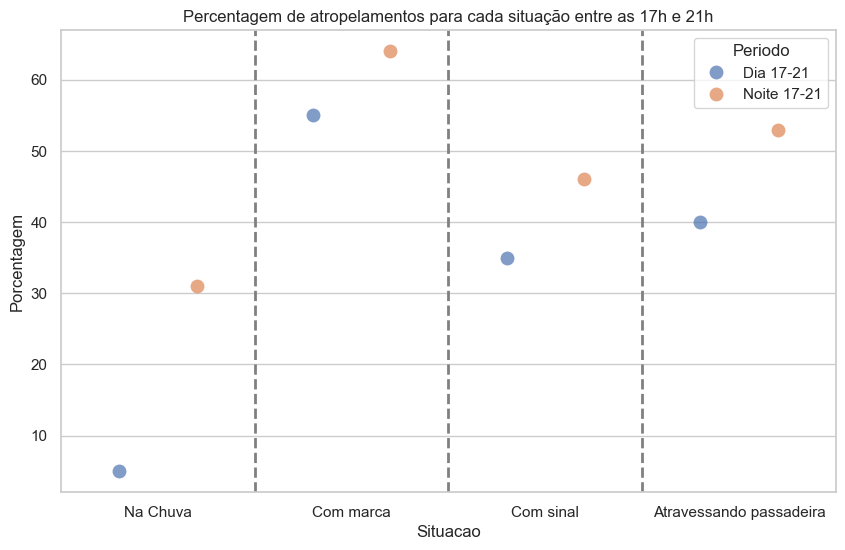

In [70]:
# gráfico das características dos ultimos 5 distritos


bora = dados_ultimos5_noite_dia[["Atropelamentos Dia %", "Atropelamentos Noite %"]]
bora_reset = bora.reset_index()
bora_reset = bora_reset.drop("level_0", axis=1)
bora_reset.rename(columns={'level_1': 'Situacao'}, inplace=True)
bora_reset.rename(columns={'Atropelamentos Dia %': 'Dia 17-21'}, inplace=True)
bora_reset.rename(columns={'Atropelamentos Noite %': 'Noite 17-21'}, inplace=True)
situacao = ["Na Chuva", "Com marca", "Com sinal", "Atravessando passadeira"]
bora_reset = bora_reset.loc[bora_reset['Situacao'].isin(situacao)]


bora_reset['Dia 17-21'] = pd.to_numeric(bora_reset['Dia 17-21'])
bora_reset['Noite 17-21'] = pd.to_numeric(bora_reset['Noite 17-21'])


bora_melt = pd.melt(bora_reset, id_vars='Situacao', var_name='Periodo', value_name='Porcentagem')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.stripplot(x='Situacao', y='Porcentagem', hue='Periodo', data=bora_melt, jitter=True, dodge=True, marker='o', alpha=0.7, size=10)


for i, situacao in enumerate(bora_melt['Situacao'].unique()):
    if i > 0:
        plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=2)

plt.title("Percentagem de atropelamentos para cada situação entre as 17h e 21h")

In [71]:
# Comparacao dos top 5 vs ultimos 5

dados_top5_noite_dia

Atropelamentos Dia  \
Fatores Atmosféricos Na Chuva                               253   
                     Bom tempo                             2181   
Aderencia            Molhado                                386   
                     Seco                                  2044   
Marcas na via        Com marca                             1462   
                     Sem marca                              968   
Passadeira           Com sinal                              781   
                     Sem sinal                             1659   
Acao peao            Atravessando passadeira                994   
                     Outra situacao                        1446   
Reta ou Curva        Curva                                  393   
                     Reta                                  2042   
Localidade           Dentro de Localidades                 2416   
                     Fora de Localidades                     24   
Sinais Luminosos     Inexistentes/Desligados               2185   
                     A funcionar                            222   

                                             Atropelamentos Dia %  \
Fatores Atmosféricos Na Chuva                                  10   
                     Bom tempo                                 89   
Aderencia            Molhado                                   16   
                     Seco                                      84   
Marcas na via        Com marca                                 60   
                     Sem marca                                 40   
Passadeira           Com sinal                                 32   
                     Sem sinal                                 68   
Acao peao            Atravessando passadeira                   41   
                     Outra situacao                            59   
Reta ou Curva        Curva                                     16   
                     Reta                                      84   
Localidade           Dentro de Localidades                     99   
                     Fora de Localidades                        1   
Sinais Luminosos     Inexistentes/Desligados                   90   
                     A funcionar                                9   

                                             Atropelamentos Noite  \
Fatores Atmosféricos Na Chuva                                1571   
                     Bom tempo                               2025   
Aderencia            Molhado                                 1649   
                     Seco                                    1952   
Marcas na via        Com marca                               2596   
                     Sem marca                                997   
Passadeira           Com sinal                               1660   
                     Sem sinal                               1950   
Acao peao            Atravessando passadeira                 1997   
                     Outra situacao                          1613   
Reta ou Curva        Curva                                    514   
                     Reta                                    3091   
Localidade           Dentro de Localidades                   3564   
                     Fora de Localidades                       46   
Sinais Luminosos     Inexistentes/Desligados                 3274   
                     A funcionar                              293   

                                             Atropelamentos Noite %  
Fatores Atmosféricos Na Chuva                                    44  
                     Bom tempo                                   56  
Aderencia            Molhado                                     46  
                     Seco                                        54  
Marcas na via        Com marca                                   72  
                     Sem marca                                   28  
Passadeira           Com sinal                                   46

In [72]:
dados_ultimos5_noite_dia

Atropelamentos Dia  \
Fatores Atmosféricos Na Chuva                               154   
                     Bom tempo                             2919   
Aderencia            Molhado                                594   
                     Seco                                  2476   
Marcas na via        Com marca                             1701   
                     Sem marca                             1368   
Passadeira           Com sinal                             1078   
                     Sem sinal                             2014   
Acao peao            Atravessando passadeira               1250   
                     Outra situacao                        1842   
Reta ou Curva        Curva                                  421   
                     Reta                                  2665   
Localidade           Dentro de Localidades                 3021   
                     Fora de Localidades                     71   
Sinais Luminosos     Inexistentes/Desligados               2675   
                     A funcionar                            370   

                                             Atropelamentos Dia %  \
Fatores Atmosféricos Na Chuva                                   5   
                     Bom tempo                                 94   
Aderencia            Molhado                                   19   
                     Seco                                      80   
Marcas na via        Com marca                                 55   
                     Sem marca                                 44   
Passadeira           Com sinal                                 35   
                     Sem sinal                                 65   
Acao peao            Atravessando passadeira                   40   
                     Outra situacao                            60   
Reta ou Curva        Curva                                     14   
                     Reta                                      86   
Localidade           Dentro de Localidades                     98   
                     Fora de Localidades                        2   
Sinais Luminosos     Inexistentes/Desligados                   87   
                     A funcionar                               12   

                                             Atropelamentos Noite  \
Fatores Atmosféricos Na Chuva                                 997   
                     Bom tempo                               2196   
Aderencia            Molhado                                 1215   
                     Seco                                       8   
Marcas na via        Com marca                               2048   
                     Sem marca                                 11   
Passadeira           Com sinal                               1479   
                     Sem sinal                               1730   
Acao peao            Atravessando passadeira                 1695   
                     Outra situacao                          1514   
Reta ou Curva        Curva                                    536   
                     Reta                                    2667   
Localidade           Dentro de Localidades                   3091   
                     Fora de Localidades                      118   
Sinais Luminosos     Inexistentes/Desligados                 2723   
                     A funcionar                              447   

                                             Atropelamentos Noite %  
Fatores Atmosféricos Na Chuva                                    31  
                     Bom tempo                                   68  
Aderencia            Molhado                                     38  
                     Seco                                         0  
Marcas na via        Com marca                                   64  
                     Sem marca                                    0  
Passadeira           Com sinal                                   46

In [73]:
# Top 5 com o merge com os condutores

colunas = ["Id. Acidente", 'Nomeoutrosfactores', "Inf. Comp. a Acções e Manobras", 'Tempo Condução Continuada', 'Categoria Veículos']

condutores_d = condutores[colunas]

condutores_atrop_top5_dia = pd.merge(condutores_d, atropelamentos1721_top5_dia_, on="Id. Acidente", how="inner")
condutores_atrop_top5_noite = pd.merge(condutores_d, atropelamentos1721_top5_noite_, on="Id. Acidente", how="inner")

# Fatores

top5_dia_por_fatores = condutores_atrop_top5_dia.groupby(condutores_atrop_top5_dia["Nomeoutrosfactores"]).size().reset_index(name="Atropelamentos")
top5_noite_por_fatores = condutores_atrop_top5_noite.groupby(condutores_atrop_top5_noite["Nomeoutrosfactores"]).size().reset_index(name="Atropelamentos")

# Inf. Comp. a Acções e Manobras

top5_dia_por_manobras = condutores_atrop_top5_dia.groupby(condutores_atrop_top5_dia["Inf. Comp. a Acções e Manobras"]).size().reset_index(name="Atropelamentos")
top5_noite_por_manobras = condutores_atrop_top5_noite.groupby(condutores_atrop_top5_noite["Inf. Comp. a Acções e Manobras"]).size().reset_index(name="Atropelamentos")

# Tempo Condução Continuada

top5_dia_por_continua = condutores_atrop_top5_dia.groupby(condutores_atrop_top5_dia["Tempo Condução Continuada"]).size().reset_index(name="Atropelamentos")
top5_noite_por_continua = condutores_atrop_top5_noite.groupby(condutores_atrop_top5_noite["Tempo Condução Continuada"]).size().reset_index(name="Atropelamentos")

# Categoria Veículos

top5_dia_por_categoria = condutores_atrop_top5_dia.groupby(condutores_atrop_top5_dia["Categoria Veículos"]).size().reset_index(name="Atropelamentos")
top5_noite_por_categoria = condutores_atrop_top5_noite.groupby(condutores_atrop_top5_noite["Categoria Veículos"]).size().reset_index(name="Atropelamentos")
top5_noite_por_fatores

,Nomeoutrosfactores,Atropelamentos
0,Distracção,260
1,Droga por despistagem,20
2,Exames Psicotrópicos,91
3,Fadiga,7
4,Normal,2928
5,NÃO DEFINIDO,17
6,Sono/sonolência,2


In [74]:
# juntando todos os dados de noite condutores

data_noite_cond = {
    'Distracao': top5_noite_por_fatores.loc[0, 'Atropelamentos'],
    'Normal': top5_noite_por_fatores.loc[4, 'Atropelamentos'],
    'Velocidade excessiva': top5_noite_por_manobras.loc[14, 'Atropelamentos'],
    'Desrespeito Sin. Vertical': top5_noite_por_manobras.loc[4, 'Atropelamentos'],
    'Mais de 1 hora': top5_noite_por_continua['Atropelamentos'].sum() - top5_noite_por_continua.loc[4, 'Atropelamentos'],
    'Menos de 1 hora': top5_noite_por_continua.loc[4, 'Atropelamentos'],
    'Ligeiro': top5_noite_por_categoria.loc[0, 'Atropelamentos'],
    'Outros': top5_noite_por_categoria['Atropelamentos'].sum() - top5_noite_por_categoria.loc[0, 'Atropelamentos'],
}

dados_top5_noite_cond = pd.DataFrame(data_noite_cond, index=['Atropelamentos Noite'])
dados_top5_noite_cond = dados_top5_noite_cond.T

dados_top5_noite_cond['Atropelamentos Noite %'] = (dados_top5_noite_cond['Atropelamentos Noite'] / len(condutores_atrop_top5_noite)) * 100
dados_top5_noite_cond = dados_top5_noite_cond.round(0).astype(int).astype(str)
dados_top5_noite_cond = dados_top5_noite_cond.T

# juntando dados dia condutores

data_dia_cond = {
    'Distracao': top5_dia_por_fatores.loc[0, 'Atropelamentos'],
    'Normal': top5_dia_por_fatores.loc[4, 'Atropelamentos'],
    'Velocidade excessiva': top5_dia_por_manobras.loc[14, 'Atropelamentos'],
    'Desrespeito Sin. Vertical': top5_dia_por_manobras.loc[2, 'Atropelamentos'],
    'Mais de 1 hora': top5_dia_por_continua['Atropelamentos'].sum() - top5_dia_por_continua.loc[4, 'Atropelamentos'],
    'Menos de 1 hora': top5_dia_por_continua.loc[4, 'Atropelamentos'],
    'Ligeiro': top5_dia_por_categoria.loc[0, 'Atropelamentos'],
    'Outros': top5_dia_por_categoria['Atropelamentos'].sum() - top5_dia_por_categoria.loc[0, 'Atropelamentos'],
}

dados_top5_dia_cond = pd.DataFrame(data_dia_cond, index=['Atropelamentos Dia'])
dados_top5_dia_cond = dados_top5_dia_cond.T

dados_top5_dia_cond['Atropelamentos Dia %'] = (dados_top5_dia_cond['Atropelamentos Dia'] / len(condutores_atrop_top5_dia)) * 100
dados_top5_dia_cond = dados_top5_dia_cond.round(0).astype(int).astype(str)
dados_top5_dia_cond = dados_top5_dia_cond.T

#criando tabela multindex

categorias_fatores = ['Distracao', 'Normal']
categorias_manobras = ['Velocidade excessiva', 'Desrespeito Sin. Vertical']
categorias_continua = ['Mais de 1 hora', 'Menos de 1 hora']
categorias_categoria = ['Ligeiro', 'Outros']

colunas_fatores = [('Fator da causa', cat) for cat in categorias_fatores]
colunas_manobras = [('Manobra', cat) for cat in categorias_manobras]
colunas_continua = [('Tempo de conducao', cat) for cat in categorias_continua]
colunas_categoria = [('Categoria do veiculo', cat) for cat in categorias_categoria]

colunas = colunas_fatores + colunas_manobras + colunas_continua + colunas_categoria

dados_top5_noite_cond.columns = pd.MultiIndex.from_tuples(colunas)
dados_top5_dia_cond.columns = pd.MultiIndex.from_tuples(colunas)
dados_top5_dia_cond = dados_top5_dia_cond.T
dados_top5_noite_cond = dados_top5_noite_cond.T

dados_top5_noite_dia_cond = pd.concat([dados_top5_dia_cond, dados_top5_noite_cond], axis=1)
dados_top5_noite_dia_cond

Atropelamentos Dia  \
Fator da causa       Distracao                                172   
                     Normal                                  2031   
Manobra              Velocidade excessiva                      91   
                     Desrespeito Sin. Vertical                 92   
Tempo de conducao    Mais de 1 hora                          1129   
                     Menos de 1 hora                         1138   
Categoria do veiculo Ligeiro                                 2035   
                     Outros                                   232   

                                               Atropelamentos Dia %  \
Fator da causa       Distracao                                    8   
                     Normal                                      90   
Manobra              Velocidade excessiva                         4   
                     Desrespeito Sin. Vertical                    4   
Tempo de conducao    Mais de 1 hora                              50   
                     Menos de 1 hora                             50   
Categoria do veiculo Ligeiro                                     90   
                     Outros                                      10   

                                               Atropelamentos Noite  \
Fator da causa       Distracao                                  260   
                     Normal                                    2928   
Manobra              Velocidade excessiva                       163   
                     Desrespeito Sin. Vertical                  188   
Tempo de conducao    Mais de 1 hora                            1518   
                     Menos de 1 hora                           1807   
Categoria do veiculo Ligeiro                                   3147   
                     Outros                                     178   

                                               Atropelamentos Noite %  
Fator da causa       Distracao                                      8  
                     Normal                                        88  
Manobra              Velocidade excessiva                           5  
                     Desrespeito Sin. Vertical                      6  
Tempo de conducao    Mais de 1 hora                                46  
                     Menos de 1 hora                               54  
Categoria do veiculo Ligeiro                                       95  
                     Outros                                         5

In [75]:
dados_top5_noite_dia_cond[["Atropelamentos Dia %", "Atropelamentos Noite %"]]

Atropelamentos Dia %  \
Fator da causa       Distracao                                    8   
                     Normal                                      90   
Manobra              Velocidade excessiva                         4   
                     Desrespeito Sin. Vertical                    4   
Tempo de conducao    Mais de 1 hora                              50   
                     Menos de 1 hora                             50   
Categoria do veiculo Ligeiro                                     90   
                     Outros                                      10   

                                               Atropelamentos Noite %  
Fator da causa       Distracao                                      8  
                     Normal                                        88  
Manobra              Velocidade excessiva                           5  
                     Desrespeito Sin. Vertical                      6  
Tempo de conducao    Mais de 1 hora                                46  
                     Menos de 1 hora                               54  
Categoria do veiculo Ligeiro                                       95  
                     Outros                                         5

In [76]:
# Ultimos 5 com o merge com os condutores

condutores_atrop_ultimos5_dia = pd.merge(condutores_d, atropelamentos1721_ultimos5_dia_, on="Id. Acidente", how="inner")
condutores_atrop_ultimos5_noite = pd.merge(condutores_d, atropelamentos1721_ultimos5_noite_, on="Id. Acidente", how="inner")

# Fatores

ultimos5_dia_por_fatores = condutores_atrop_ultimos5_dia.groupby(condutores_atrop_ultimos5_dia["Nomeoutrosfactores"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_fatores = condutores_atrop_ultimos5_noite.groupby(condutores_atrop_ultimos5_noite["Nomeoutrosfactores"]).size().reset_index(name="Atropelamentos")

# Inf. Comp. a Acções e Manobras

ultimos5_dia_por_manobras = condutores_atrop_ultimos5_dia.groupby(condutores_atrop_ultimos5_dia["Inf. Comp. a Acções e Manobras"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_manobras = condutores_atrop_ultimos5_noite.groupby(condutores_atrop_ultimos5_noite["Inf. Comp. a Acções e Manobras"]).size().reset_index(name="Atropelamentos")

# Tempo Condução Continuada

ultimos5_dia_por_continua = condutores_atrop_ultimos5_dia.groupby(condutores_atrop_ultimos5_dia["Tempo Condução Continuada"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_continua = condutores_atrop_ultimos5_noite.groupby(condutores_atrop_ultimos5_noite["Tempo Condução Continuada"]).size().reset_index(name="Atropelamentos")

# Categoria Veículos

ultimos5_dia_por_categoria = condutores_atrop_ultimos5_dia.groupby(condutores_atrop_ultimos5_dia["Categoria Veículos"]).size().reset_index(name="Atropelamentos")
ultimos5_noite_por_categoria = condutores_atrop_ultimos5_noite.groupby(condutores_atrop_ultimos5_noite["Categoria Veículos"]).size().reset_index(name="Atropelamentos")

In [77]:
# juntando todos os dados de noite condutores

data_noite_cond = {
    'Distracao': ultimos5_noite_por_fatores.loc[0, 'Atropelamentos'],
    'Normal': ultimos5_noite_por_fatores.loc[5, 'Atropelamentos'],
    'Velocidade excessiva': ultimos5_noite_por_manobras.loc[14, 'Atropelamentos'],
    'Desrespeito Sin. Vertical': ultimos5_noite_por_manobras.loc[2, 'Atropelamentos'],
    'Mais de 1 hora': ultimos5_noite_por_continua['Atropelamentos'].sum() - ultimos5_noite_por_continua.loc[4, 'Atropelamentos'],
    'Menos de 1 hora': ultimos5_noite_por_continua.loc[4, 'Atropelamentos'],
    'Ligeiro': ultimos5_noite_por_categoria.loc[0, 'Atropelamentos'],
    'Outros': ultimos5_noite_por_categoria['Atropelamentos'].sum() - ultimos5_noite_por_categoria.loc[0, 'Atropelamentos'],
}

dados_ultimos5_noite_cond = pd.DataFrame(data_noite_cond, index=['Atropelamentos Noite'])
dados_ultimos5_noite_cond = dados_ultimos5_noite_cond.T

dados_ultimos5_noite_cond['Atropelamentos Noite %'] = (dados_ultimos5_noite_cond['Atropelamentos Noite'] / len(condutores_atrop_ultimos5_noite)) * 100
dados_ultimos5_noite_cond = dados_ultimos5_noite_cond.round(0).astype(int).astype(str)
dados_ultimos5_noite_cond = dados_ultimos5_noite_cond.T

# juntando dados dia condutores

data_dia_cond = {
    'Distracao': ultimos5_dia_por_fatores.loc[0, 'Atropelamentos'],
    'Normal': ultimos5_dia_por_fatores.loc[5, 'Atropelamentos'],
    'Velocidade excessiva': ultimos5_dia_por_manobras.loc[12, 'Atropelamentos'],
    'Desrespeito Sin. Vertical': ultimos5_dia_por_manobras.loc[2, 'Atropelamentos'],
    'Mais de 1 hora': ultimos5_dia_por_continua['Atropelamentos'].sum() - ultimos5_dia_por_continua.loc[4, 'Atropelamentos'],
    'Menos de 1 hora': ultimos5_dia_por_continua.loc[4, 'Atropelamentos'],
    'Ligeiro': ultimos5_dia_por_categoria.loc[0, 'Atropelamentos'],
    'Outros': ultimos5_dia_por_categoria['Atropelamentos'].sum() - ultimos5_dia_por_categoria.loc[0, 'Atropelamentos'],
}

dados_ultimos5_dia_cond = pd.DataFrame(data_dia_cond, index=['Atropelamentos Dia'])
dados_ultimos5_dia_cond = dados_ultimos5_dia_cond.T

dados_ultimos5_dia_cond['Atropelamentos Dia %'] = (dados_ultimos5_dia_cond['Atropelamentos Dia'] / len(condutores_atrop_ultimos5_dia)) * 100
dados_ultimos5_dia_cond = dados_ultimos5_dia_cond.round(0).astype(int).astype(str)
dados_ultimos5_dia_cond = dados_ultimos5_dia_cond.T

#criando tabela multindex

categorias_fatores = ['Distracao', 'Normal']
categorias_manobras = ['Velocidade excessiva', 'Desrespeito Sin. Vertical']
categorias_continua = ['Mais de 1 hora', 'Menos de 1 hora']
categorias_categoria = ['Ligeiro', 'Outros']

colunas_fatores = [('Fator da causa', cat) for cat in categorias_fatores]
colunas_manobras = [('Manobra', cat) for cat in categorias_manobras]
colunas_continua = [('Tempo de conducao', cat) for cat in categorias_continua]
colunas_categoria = [('Categoria do veiculo', cat) for cat in categorias_categoria]

colunas = colunas_fatores + colunas_manobras + colunas_continua + colunas_categoria

dados_ultimos5_noite_cond.columns = pd.MultiIndex.from_tuples(colunas)
dados_ultimos5_dia_cond.columns = pd.MultiIndex.from_tuples(colunas)
dados_ultimos5_dia_cond = dados_ultimos5_dia_cond.T
dados_ultimos5_noite_cond = dados_ultimos5_noite_cond.T

dados_ultimos5_noite_dia_cond = pd.concat([dados_ultimos5_dia_cond, dados_ultimos5_noite_cond], axis=1)


In [78]:
# Comparacao Top 5 vs Ultimos 5 tabela condutores

dados_top5_noite_dia_cond

Atropelamentos Dia  \
Fator da causa       Distracao                                172   
                     Normal                                  2031   
Manobra              Velocidade excessiva                      91   
                     Desrespeito Sin. Vertical                 92   
Tempo de conducao    Mais de 1 hora                          1129   
                     Menos de 1 hora                         1138   
Categoria do veiculo Ligeiro                                 2035   
                     Outros                                   232   

                                               Atropelamentos Dia %  \
Fator da causa       Distracao                                    8   
                     Normal                                      90   
Manobra              Velocidade excessiva                         4   
                     Desrespeito Sin. Vertical                    4   
Tempo de conducao    Mais de 1 hora                              50   
                     Menos de 1 hora                             50   
Categoria do veiculo Ligeiro                                     90   
                     Outros                                      10   

                                               Atropelamentos Noite  \
Fator da causa       Distracao                                  260   
                     Normal                                    2928   
Manobra              Velocidade excessiva                       163   
                     Desrespeito Sin. Vertical                  188   
Tempo de conducao    Mais de 1 hora                            1518   
                     Menos de 1 hora                           1807   
Categoria do veiculo Ligeiro                                   3147   
                     Outros                                     178   

                                               Atropelamentos Noite %  
Fator da causa       Distracao                                      8  
                     Normal                                        88  
Manobra              Velocidade excessiva                           5  
                     Desrespeito Sin. Vertical                      6  
Tempo de conducao    Mais de 1 hora                                46  
                     Menos de 1 hora                               54  
Categoria do veiculo Ligeiro                                       95  
                     Outros                                         5

In [79]:
dados_ultimos5_noite_dia_cond

Atropelamentos Dia  \
Fator da causa       Distracao                                204   
                     Normal                                  2557   
Manobra              Velocidade excessiva                      86   
                     Desrespeito Sin. Vertical                128   
Tempo de conducao    Mais de 1 hora                          1821   
                     Menos de 1 hora                         1006   
Categoria do veiculo Ligeiro                                 2514   
                     Outros                                   313   

                                               Atropelamentos Dia %  \
Fator da causa       Distracao                                    7   
                     Normal                                      90   
Manobra              Velocidade excessiva                         3   
                     Desrespeito Sin. Vertical                    5   
Tempo de conducao    Mais de 1 hora                              64   
                     Menos de 1 hora                             36   
Categoria do veiculo Ligeiro                                     89   
                     Outros                                      11   

                                               Atropelamentos Noite  \
Fator da causa       Distracao                                  213   
                     Normal                                    2595   
Manobra              Velocidade excessiva                       135   
                     Desrespeito Sin. Vertical                  168   
Tempo de conducao    Mais de 1 hora                            1927   
                     Menos de 1 hora                            994   
Categoria do veiculo Ligeiro                                   2686   
                     Outros                                     235   

                                               Atropelamentos Noite %  
Fator da causa       Distracao                                      7  
                     Normal                                        89  
Manobra              Velocidade excessiva                           5  
                     Desrespeito Sin. Vertical                      6  
Tempo de conducao    Mais de 1 hora                                66  
                     Menos de 1 hora                               34  
Categoria do veiculo Ligeiro                                       92  
                     Outros                                         8

In [80]:
# Como chuva parece afetar consideravelmente, comparamos agora a proporçao de atropelamentos entre 
# 17h-21h noite com chuva x 17h-21h dia com bom tempo

In [81]:
# Natureza com mais percentagem de acidentes nesta situacao

acidentes1721_dia_bomtempo = acidentes1721_dia.loc[acidentes1721_dia["Factores Atmosféricos"] == "Bom tempo"]
acidentes1721_noite_chuva = acidentes1721_noite.loc[acidentes1721_noite["Factores Atmosféricos"] == "Chuva"]

atropelamento1721_dia_bomtempo = acidentes1721_dia_bomtempo.loc[acidentes1721_dia_bomtempo["Natureza"] == "Atropelamento de peões"]
atropelamento1721_noite_chuva = acidentes1721_noite_chuva.loc[acidentes1721_noite_chuva["Natureza"] == "Atropelamento de peões"]

acidentes1721_dia_bomtempo_por_natureza = acidentes1721_dia_bomtempo.groupby(acidentes1721_dia_bomtempo["Natureza"]).size().reset_index(name="Acidentes")
acidentes1721_dia_bomtempo_por_natureza["Percentagem"] = round((acidentes1721_dia_bomtempo_por_natureza["Acidentes"] / acidentes1721_dia_bomtempo_por_natureza["Acidentes"].sum())*100,2)

acidentes1721_noite_chuva_por_natureza = acidentes1721_noite_chuva.groupby(acidentes1721_noite_chuva["Natureza"]).size().reset_index(name="Acidentes")
acidentes1721_noite_chuva_por_natureza["Percentagem"] = round((acidentes1721_noite_chuva_por_natureza["Acidentes"] / acidentes1721_noite_chuva_por_natureza["Acidentes"].sum())*100,2)
acidentes1721_noite_chuva_por_natureza

,Natureza,Acidentes,Percentagem
0,Atropelamento com fuga,189,1.68
1,Atropelamento de animais,19,0.17
2,Atropelamento de peões,3245,28.77
3,Colisão choque em cadeia,223,1.98
4,Colisão com fuga,130,1.15
5,Colisão com outras situações,589,5.22
6,Colisão com veiculo ou obstáculo na faixa de r...,285,2.53
7,Colisão frontal,971,8.61
8,Colisão lateral com outro veículo em movimento,1481,13.13
9,Colisão traseira com outro veículo em movimento,1103,9.78


In [82]:
# Observando se afeta todos os Distritos 

acidentes1721_dia_bomtempo_por_distrito = acidentes1721_dia_bomtempo.groupby(acidentes1721_dia_bomtempo["Distrito"]).size().reset_index(name="Acidentes dia bom tempo")
atropelamento1721_dia_bomtempo_por_distrito = atropelamento1721_dia_bomtempo.groupby(atropelamento1721_dia_bomtempo["Distrito"]).size().reset_index(name="Atrop. dia bom tempo")

acidentes_atropelamentos_bom_tempo = pd.merge(acidentes1721_dia_bomtempo_por_distrito, atropelamento1721_dia_bomtempo_por_distrito, on="Distrito", how="inner")
acidentes_atropelamentos_bom_tempo["Perc"] = round(acidentes_atropelamentos_bom_tempo["Atrop. dia bom tempo"] / acidentes_atropelamentos_bom_tempo["Acidentes dia bom tempo"]*100,2)

acidentes1721_noite_chuva_por_distrito = acidentes1721_noite_chuva.groupby(acidentes1721_noite_chuva["Distrito"]).size().reset_index(name="Acidentes noite chuva")
atropelamento1721_noite_chuva_por_distrito = atropelamento1721_noite_chuva.groupby(atropelamento1721_noite_chuva["Distrito"]).size().reset_index(name="Atrop. noite chuva")

acidentes_atropelamentos_noite_chuva = pd.merge(acidentes1721_noite_chuva_por_distrito, atropelamento1721_noite_chuva_por_distrito, on="Distrito", how="inner")
acidentes_atropelamentos_noite_chuva["Perc nc"] = round(acidentes_atropelamentos_noite_chuva["Atrop. noite chuva"] / acidentes_atropelamentos_noite_chuva["Acidentes noite chuva"]*100,2)


tudo_junto = pd.merge(acidentes_atropelamentos_bom_tempo, acidentes_atropelamentos_noite_chuva, on="Distrito", how="inner")
tudo_junto["Diferença percentagem"] = tudo_junto["Perc nc"] - tudo_junto["Perc"]
tudo_junto = tudo_junto.sort_values("Diferença percentagem", ascending=False)
tudo_junto

,Distrito,Acidentes dia bom tempo,Atrop. dia bom tempo,Perc,Acidentes noite chuva,Atrop. noite chuva,Perc nc,Diferença percentagem
15,Vila Real,805,101,12.55,215,81,37.67,25.12
2,Braga,3789,485,12.80,1391,497,35.73,22.93
3,Bragança,527,68,12.90,130,41,31.54,18.64
11,Porto,7155,1310,18.31,2309,780,33.78,15.47
14,Viana do Castelo,1090,110,10.09,351,82,23.36,13.27
13,Setúbal,3558,611,17.17,581,176,30.29,13.12
0,Aveiro,3531,382,10.82,911,215,23.60,12.78
4,Castelo Branco,782,98,12.53,165,39,23.64,11.11
16,Viseu,1736,191,11.00,451,99,21.95,10.95
9,Lisboa,9854,2184,22.16,2402,789,32.85,10.69


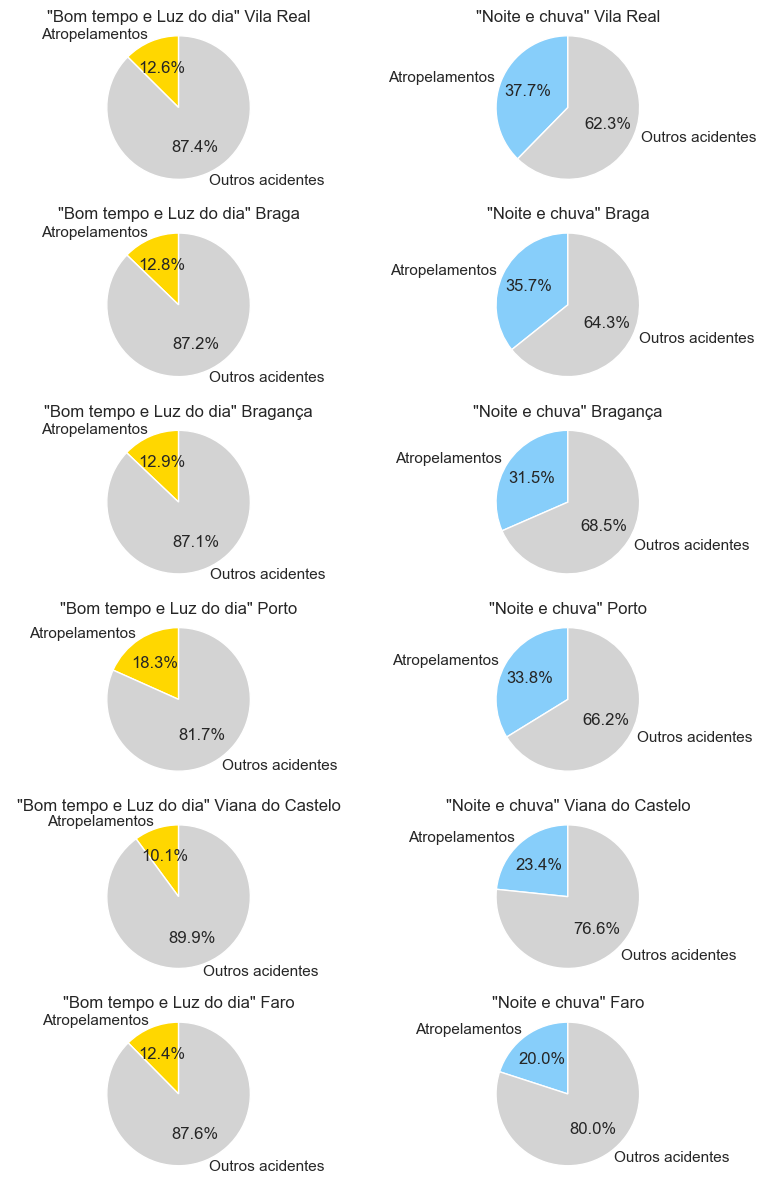

In [83]:
# grafico de pizza distritos "Dia bom tempo" x "Noite chuva"


top5 = ["Vila Real", "Braga", "Bragança", "Porto", "Viana do Castelo", "Faro"]

top5_df = tudo_junto.loc[tudo_junto["Distrito"].isin(top5)]
top5_df = top5_df[["Distrito","Perc", "Perc nc"]]
top5_df["1-perc"] = 100 - top5_df["Perc"]
top5_df["1-perc nc"] = 100 - top5_df["Perc nc"]
df = top5_df



num_distritos = len(df['Distrito'])


fig, axes = plt.subplots(nrows=num_distritos, ncols=2, figsize=(8, 2 * num_distritos))


for i, distrito in enumerate(df['Distrito']):
   
    distrito_data = df[df['Distrito'] == distrito]

    labels_dia_bom_tempo = ['Atropelamentos', 'Outros acidentes']

    sizes_dia_bom_tempo = [
        distrito_data['Perc'].values[0],
        distrito_data['1-perc'].values[0]
    ]

    # Cria o primeiro gráfico de pizza
    axes[i, 0].pie(sizes_dia_bom_tempo, labels=labels_dia_bom_tempo, autopct='%1.1f%%', startangle=90,
                   colors=['gold', 'lightgrey'])
    axes[i, 0].set_title(f'"Bom tempo e Luz do dia" {distrito}')
    axes[i, 0].axis('equal') 

    labels_noite_chuva = ['Atropelamentos', 'Outros acidentes']
    
    sizes_noite_chuva = [
        distrito_data['Perc nc'].values[0],
        distrito_data['1-perc nc'].values[0]
    ]

  
    axes[i, 1].pie(sizes_noite_chuva, labels=labels_noite_chuva, autopct='%1.1f%%', startangle=90,
                   colors=['lightskyblue', 'lightgrey'])
    axes[i, 1].set_title(f'"Noite e chuva" {distrito}')
    axes[i, 1].axis('equal')  

plt.tight_layout()


plt.show()

In [84]:
# Mesma analise da anterior, vamos ver o que difere 

In [85]:
acidentes1721_top5_dia_sol = acidentes1721_dia_bomtempo.loc[(acidentes1721_dia_bomtempo["Distrito"] == "Braga")
                                       |(acidentes1721_dia_bomtempo["Distrito"] == "Vila Real")
                                       |(acidentes1721_dia_bomtempo["Distrito"] == "Bragança")
                                       |(acidentes1721_dia_bomtempo["Distrito"] == "Viana do Castelo")
                                        |(acidentes1721_dia_bomtempo["Distrito"] == 'Porto')]

acidentes1721_top5_noite_chuva = acidentes1721_noite_chuva.loc[(acidentes1721_noite_chuva["Distrito"] == "Braga")
                                       |(acidentes1721_noite_chuva["Distrito"] == "Vila Real")
                                       |(acidentes1721_noite_chuva["Distrito"] == "Bragança")
                                       |(acidentes1721_noite_chuva["Distrito"] == "Viana do Castelo")
                                        |(acidentes1721_noite_chuva["Distrito"] == 'Porto')]

atropelamentos1721_top5_dia_sol = acidentes1721_top5_dia_sol.loc[acidentes1721_top5_dia_sol["Natureza"] == "Atropelamento de peões"]
atropelamentos1721_top5_noite_chuva = acidentes1721_top5_noite_chuva.loc[acidentes1721_top5_noite_chuva["Natureza"] == "Atropelamento de peões"]

dropar = ['Entidades Fiscalizadoras','Km','Cod Via','Latitude GPS','Longitude GPS','Dia','Mês','Hora','Hora cheia', 'Obstáculos', 'Pov. Proxima', 'Obras Arte', 'Sentidos']

atropelamentos1721_top5_dia_sol_ = atropelamentos1721_top5_dia_sol.drop(dropar, axis=1)
atropelamentos1721_top5_noite_chuva_ = atropelamentos1721_top5_noite_chuva.drop(dropar, axis=1)

top5sol_dia_com_acoes_peoes = pd.merge(atropelamentos1721_top5_dia_sol_, peoes_acoes, on = "Id. Acidente", how = "inner")
top5chuva_noite_com_acoes_peoes = pd.merge(atropelamentos1721_top5_noite_chuva_, peoes_acoes, on = "Id. Acidente", how = "inner")



In [86]:
# Marca Via (sol bom tempo x chuva noite)

top5_dia_sol_por_MarcaVia = top5sol_dia_com_acoes_peoes.groupby(top5sol_dia_com_acoes_peoes["Marca Via"]).size().reset_index(name="Atropelamentos")

top5_chuva_noite_por_MarcaVia = top5chuva_noite_com_acoes_peoes.groupby(top5chuva_noite_com_acoes_peoes["Marca Via"]).size().reset_index(name="Atropelamentos")

top5_dia_sol_por_MarcaVia["percentagem"] = top5_dia_sol_por_MarcaVia["Atropelamentos"] / top5_dia_sol_por_MarcaVia["Atropelamentos"].sum()
top5_chuva_noite_por_MarcaVia["percentagem"] = top5_chuva_noite_por_MarcaVia["Atropelamentos"] / top5_chuva_noite_por_MarcaVia["Atropelamentos"].sum()


# Sinal de passagem de peoes 

top5_dia_sol_por_Sinais = top5sol_dia_com_acoes_peoes.groupby(top5sol_dia_com_acoes_peoes["Sinais"]).size().reset_index(name="Atropelamentos")

top5_noite_chuva_por_Sinais = top5chuva_noite_com_acoes_peoes.groupby(top5chuva_noite_com_acoes_peoes["Sinais"]).size().reset_index(name="Atropelamentos")

top5_dia_sol_por_Sinais["percentagem"] = top5_dia_sol_por_Sinais["Atropelamentos"] / top5_dia_sol_por_Sinais["Atropelamentos"].sum()
top5_noite_chuva_por_Sinais["percentagem"] = top5_noite_chuva_por_Sinais["Atropelamentos"] / top5_noite_chuva_por_Sinais["Atropelamentos"].sum()



# Acoes peoes 

top5_dia_sol_por_acao = top5sol_dia_com_acoes_peoes.groupby(top5sol_dia_com_acoes_peoes["Acções Peão"]).size().reset_index(name="Atropelamentos")

top5_noite_chuva_por_acao = top5chuva_noite_com_acoes_peoes.groupby(top5chuva_noite_com_acoes_peoes["Acções Peão"]).size().reset_index(name="Atropelamentos")

top5_dia_sol_por_acao["percentagem"] = top5_dia_sol_por_acao["Atropelamentos"] / top5_dia_sol_por_acao["Atropelamentos"].sum()
top5_noite_chuva_por_acao["percentagem"] = top5_noite_chuva_por_acao["Atropelamentos"] / top5_noite_chuva_por_acao["Atropelamentos"].sum()

,Sinais,Atropelamentos,percentagem
0,Cedência de passagem,14,0.006419
1,NÃO DEFINIDO,801,0.367263
2,Outros,616,0.282439
3,Passagem de peões,706,0.323705
4,Proibição de ultrapassagem,11,0.005044
5,Stop,33,0.015131


In [87]:
# juntando todos os dados de chuva noite

data_noite_bc = {
    'Com marca': top5_chuva_noite_por_MarcaVia.loc[0, 'Atropelamentos'] + top5_chuva_noite_por_MarcaVia.loc[1, 'Atropelamentos'],
    'Sem marca': top5_chuva_noite_por_MarcaVia.loc[3, 'Atropelamentos'],
    'Com sinal': top5_noite_chuva_por_Sinais.loc[3, 'Atropelamentos'],
    'Sem sinal': top5_noite_chuva_por_Sinais['Atropelamentos'].sum() - top5_noite_chuva_por_Sinais.loc[3, 'Atropelamentos'],
    'Atravessando passadeira': top5_noite_chuva_por_acao.loc[1, 'Atropelamentos'],
    'Outra situacao': top5_noite_chuva_por_acao['Atropelamentos'].sum() - top5_noite_chuva_por_acao.loc[1, 'Atropelamentos'],
}

top5_chuva_noite_df = pd.DataFrame(data_noite_bc, index=['Atropelamentos Noite'])
top5_chuva_noite_df = top5_chuva_noite_df.T

top5_chuva_noite_df['Atropelamentos Noite %'] = (top5_chuva_noite_df['Atropelamentos Noite'] / len(top5chuva_noite_com_acoes_peoes)) * 100
top5_chuva_noite_df = top5_chuva_noite_df.round(0).astype(int).astype(str)
top5_chuva_noite_df = top5_chuva_noite_df.T

# juntando todos os dados de chuva noite

data_dia_bc = {
    'Com marca': top5_dia_sol_por_MarcaVia.loc[0, 'Atropelamentos'] + top5_dia_sol_por_MarcaVia.loc[1, 'Atropelamentos'],
    'Sem marca': top5_dia_sol_por_MarcaVia.loc[3, 'Atropelamentos'],
    'Com sinal': top5_dia_sol_por_Sinais.loc[3, 'Atropelamentos'],
    'Sem sinal': top5_dia_sol_por_Sinais['Atropelamentos'].sum() - top5_dia_sol_por_Sinais.loc[3, 'Atropelamentos'],
    'Atravessando passadeira': top5_dia_sol_por_acao.loc[1, 'Atropelamentos'],
    'Outra situacao': top5_dia_sol_por_acao['Atropelamentos'].sum() - top5_dia_sol_por_acao.loc[1, 'Atropelamentos'],
}

top5_dia_sol_df = pd.DataFrame(data_dia_bc, index=['Atropelamentos Dia'])
top5_dia_sol_df = top5_dia_sol_df.T

top5_dia_sol_df['Atropelamentos Dia %'] = (top5_dia_sol_df['Atropelamentos Dia'] / len(top5sol_dia_com_acoes_peoes)) * 100
top5_dia_sol_df = top5_dia_sol_df.round(0).astype(int).astype(str)
top5_dia_sol_df = top5_dia_sol_df.T

#criando tabela multindex

categorias_marcas = ['Com marca', 'Sem marca']
categorias_sinal = ['Com sinal', 'Sem sinal']
categorias_acao = ['Atravessando passadeira', 'Outra situacao']

colunas_marcas = [('Marcas na via', cat) for cat in categorias_marcas]
colunas_sinal = [('Passadeira', cat) for cat in categorias_sinal]
colunas_acao = [('Acao peao', cat) for cat in categorias_acao]

colunas = colunas_marcas + colunas_sinal + colunas_acao

top5_chuva_noite_df.columns = pd.MultiIndex.from_tuples(colunas)
top5_dia_sol_df.columns = pd.MultiIndex.from_tuples(colunas)
top5_dia_sol_df = top5_dia_sol_df.T
top5_chuva_noite_df = top5_chuva_noite_df.T

dados_top5_bc = pd.concat([top5_dia_sol_df, top5_chuva_noite_df], axis=1)

dados_top5_bc

Atropelamentos Dia Atropelamentos Dia %  \
Marcas na via Com marca                             1307                   60   
              Sem marca                              866                   40   
Passadeira    Com sinal                              706                   32   
              Sem sinal                             1475                   68   
Acao peao     Atravessando passadeira                888                   41   
              Outra situacao                        1293                   59   

                                      Atropelamentos Noite  \
Marcas na via Com marca                               1172   
              Sem marca                                390   
Passadeira    Com sinal                                823   
              Sem sinal                                748   
Acao peao     Atravessando passadeira                  980   
              Outra situacao                           591   

                                      Atropelamentos Noite %  
Marcas na via Com marca                                   75  
              Sem marca                                   25  
Passadeira    Com sinal                                   52  
              Sem sinal                                   48  
Acao peao     Atravessando passadeira                     62  
              Outra situacao                              38

In [88]:
# Gravidade dos atropelamentos

In [89]:
# gravidade dos atropelamentos de dia X noite (17-21)

In [90]:
peoes_atropelados_dia1721 = pd.merge(atropelamentos_peoes_dia1721, peoes, on='Id. Acidente', how='inner')
peoes_atropelados_noite1721 = pd.merge(atropelamentos_peoes_noite1721, peoes, on='Id. Acidente', how='inner')

peoes_atropelados_dia_por_lesoes1721 = peoes_atropelados_dia1721.groupby('Lesões a 30 dias').size().reset_index(name='Atropelamento_dia1721')
peoes_atropelados_noite_por_lesoes1721 = peoes_atropelados_noite1721.groupby('Lesões a 30 dias').size().reset_index(name='Atropelamento_noite1721')

peoes_atropelados_dia_por_lesoes1721['Percentagem_dia'] = round((peoes_atropelados_dia_por_lesoes1721['Atropelamento_dia1721'] / peoes_atropelados_dia_por_lesoes1721['Atropelamento_dia1721'].sum() * 100),2)
peoes_atropelados_noite_por_lesoes1721['Percentagem_noite'] = round((peoes_atropelados_noite_por_lesoes1721['Atropelamento_noite1721'] / peoes_atropelados_noite_por_lesoes1721['Atropelamento_noite1721'].sum() * 100),2)

peoes_atropelados_dia_noite_por_lesoes1721 = pd.merge(peoes_atropelados_dia_por_lesoes1721, peoes_atropelados_noite_por_lesoes1721, on='Lesões a 30 dias', how='inner')

peoes_atropelados_dia_noite_por_lesoes1721

,Lesões a 30 dias,Atropelamento_dia1721,Percentagem_dia,Atropelamento_noite1721,Percentagem_noite
0,Ferido grave,537,6.89,818,8.56
1,Ferido leve,7127,91.43,8387,87.74
2,Ileso,10,0.13,14,0.15
3,Morto,121,1.55,340,3.56


In [91]:
# vendo se os atropelamentos tendem a causar feridos mais graves de forma geral

In [92]:
outros_acidentes = acidentes[~acidentes.isin(atropelamento_peoes.to_dict('list')).all(axis=1)]

In [93]:
# proporcao graves atropelamentos (graves + mortos)

atropelamentos_mortos = atropelamento_peoes["Num. Mortos a 30 dias"].sum()
atropelamentos_graves = atropelamento_peoes["Num. Feridos graves a 30 dias"].sum()
atropelamentos_gm = atropelamentos_mortos + atropelamentos_graves
proporcao_atrop_gm = atropelamentos_gm/(atropelamento_peoes["Num. Feridos ligeiros a 30 dias"].sum() + atropelamentos_gm) * 100
proporcao_atrop_gm

# proporcao graves outros acidentes (graves + mortos)

outros_acidentes_mortos = outros_acidentes["Num. Mortos a 30 dias"].sum()
outros_acidentes_graves = outros_acidentes["Num. Feridos graves a 30 dias"].sum()
outros_acidentes_gm = outros_acidentes_mortos + outros_acidentes_graves
proporcao_acid_gm = outros_acidentes_gm/(outros_acidentes["Num. Feridos ligeiros a 30 dias"].sum() + outros_acidentes_gm) * 100
proporcao_acid_gm


data_gm = {'Em Atropelamentos': atropelamentos_gm,
            'Em Atropelamentos %': proporcao_atrop_gm,
            'Em Acidentes': outros_acidentes_gm,
            'Em Acidentes %': proporcao_acid_gm}

dados_gravidade = pd.DataFrame(data_gm, index=['Feridos Graves/Mortos'])
dados_gravidade = dados_gravidade.T
dados_gravidade = dados_gravidade.round(0).astype(int).astype(str)

dados_gravidade

,Feridos Graves/Mortos
Em Atropelamentos,5210
Em Atropelamentos %,10
Em Acidentes,22734
Em Acidentes %,6


In [94]:
## Modelo

In [95]:
# limpeza

In [96]:
# Vendo existencia de valores nulos no dataset inical para o modelo

colunas = ['Id. Acidente', 'Datahora', 'Dia da Semana', 'Num. Mortos a 30 dias', 'Num. Feridos graves a 30 dias', 'Cond Aderência', 'Distrito', 'Concelho', 
           'Localizações', 'Factores Atmosféricos', 'Luminosidade', 'Marca Via', 'Natureza', 'Sinais', 'Sinais Luminosos']

acidentes_modelo = acidentes[colunas]

acidentes_modelo.isnull().any().any()

False

In [97]:
# Alterando valores nao definidos para nulos

acidentes_modelo = acidentes_modelo.replace('NÃO DEFINIDO', np.nan)
acidentes_modelo.isnull().sum().sum()

154649

In [98]:
# Observando que a maioria dos nulos sao por conta da coluna sinais

acidentes_modelo['Sinais'].isnull().sum()

147285

In [99]:
# Substituir os nulos de sinais por "Outros" e depois dropar os restantes dos nulos

acidentes_modelo['Sinais'] = acidentes_modelo['Sinais'].fillna('Outros')

acidentes_modelo = acidentes_modelo.dropna()

In [100]:
## pre processamento

In [101]:
# feature engineering

acidentes_modelo['Atropelamento'] = acidentes_modelo['Natureza'].apply(lambda x: 1 if x == 'Atropelamento de peões' else 0)

acidentes_modelo['Entre 17h e 21h'] = np.where(((acidentes_modelo['Datahora'].dt.hour >= 17) & (acidentes_modelo['Datahora'].dt.hour <= 21)), 1, 0)

acidentes_modelo['Entre 17 e 21 (Noite e chuva)'] = np.where(((acidentes_modelo['Datahora'].dt.hour >= 17) & (acidentes_modelo['Datahora'].dt.hour <= 21) & 
                                                      ((acidentes_modelo['Luminosidade'] == 'Noite, com iluminação') | 
                                                       (acidentes_modelo['Luminosidade'] == 'Noite, sem iluminação') |
                                                         (acidentes_modelo['Luminosidade'] == 'Aurora ou crepúsculo'))
                                                        & (acidentes_modelo['Factores Atmosféricos'] == 'Chuva')), 1, 0)

acidentes_modelo['Top 5 Distritos'] = np.where(
    (acidentes_modelo['Distrito'] == 'Braga') | 
    (acidentes_modelo['Distrito'] == 'Porto') | 
    (acidentes_modelo['Distrito'] == 'Viana do Castelo') | 
    (acidentes_modelo['Distrito'] == 'Bragança') | 
    (acidentes_modelo['Distrito'] == 'Vila Real'), 1, 0)

acidentes_modelo['Piso Molhado'] = acidentes_modelo['Cond Aderência'].apply(lambda x: 1 if x == 'Molhado' else 0)

acidentes_modelo['Dentro de Localidades'] = acidentes_modelo['Localizações'].apply(lambda x: 1 if x == 'Dentro das localidades' else 0)

acidentes_modelo['Sinal Passadeira'] = acidentes_modelo['Sinais'].apply(lambda x: 1 if x == 'Passagem de peões' else 0)

acidentes_modelo['Sem sinais luminosos'] = np.where(
    (acidentes_modelo['Sinais Luminosos'] == 'Inexistentes') | 
    (acidentes_modelo['Sinais Luminosos'] == 'Desligada'), 1, 0)

acidentes_modelo['Feridos Graves/Mortos'] = np.where(
    (acidentes_modelo['Num. Mortos a 30 dias'] != 0) | 
    (acidentes_modelo['Num. Feridos graves a 30 dias'] != 0), 1, 0)

acidentes_modelo['Marcas na via'] = np.where(
    (acidentes_modelo['Marca Via'] == 'Com marcas - separadoras de sentido e de vias de trânsito') | 
    (acidentes_modelo['Marca Via'] == 'Com marcas - separadoras de sentido de trânsito'), 1, 0)

acidentes_modelo['Noite'] = np.where(
    (acidentes_modelo['Luminosidade'] == 'Noite, com iluminação') | 
    (acidentes_modelo['Luminosidade'] == 'Noite, sem iluminação') |
    (acidentes_modelo['Luminosidade'] == 'Aurora ou crepúsculo'), 1, 0)

acidentes_modelo['Chuva'] = acidentes_modelo['Factores Atmosféricos'].apply(lambda x: 1 if x == 'Chuva' else 0)

acidentes_modelo['Top 5 Concelhos'] = np.where(
    (acidentes_modelo['Concelho'] == 'Matosinhos') | 
    (acidentes_modelo['Concelho'] == 'Gondomar') | 
    (acidentes_modelo['Concelho'] == 'Vila Nova de Famalicao') | 
    (acidentes_modelo['Concelho'] == 'Braga') | 
    (acidentes_modelo['Concelho'] == 'Guimaraes'), 1, 0)

acidentes_modelo["Top 3 meses"] = np.where((acidentes_modelo["Datahora"].dt.month == 11)
                                           |(acidentes_modelo["Datahora"].dt.month == 12)
                                            |(acidentes_modelo["Datahora"].dt.month == 1), 1, 0)

acidentes_modelo_id = acidentes_modelo.drop(["Dia da Semana", 'Num. Mortos a 30 dias', 'Num. Feridos graves a 30 dias', 'Cond Aderência', 'Localizações', 'Factores Atmosféricos', 'Luminosidade', 'Marca Via', 'Natureza', 'Sinais', 'Sinais Luminosos', "Datahora", "Distrito", "Concelho"], axis=1)
acidentes_modelo = acidentes_modelo_id.drop(['Id. Acidente'], axis=1)

In [102]:
# multicolineariade entre as variaveis preditoras

def cramer_v(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    num_rows = contingency_table.shape[0]
    num_cols = contingency_table.shape[1]
    min_dim = min(num_rows - 1, num_cols - 1)
    return np.sqrt(chi2 / (len(df) * min_dim))

colunas = acidentes_modelo.columns
combinacoes = list(combinations(colunas, 2))

for col1, col2 in combinacoes:
    v_cramer = cramer_v(acidentes_modelo, col1, col2)
    if v_cramer > 0.5:
        print(f"V de Cramer para {col1} e {col2}: {v_cramer}")

V de Cramer para Piso Molhado e Chuva: 0.7802660752114384


In [103]:
# dropando coluna piso molhado pela alta correlacao com chuva

acidentes_modelo = acidentes_modelo.drop("Piso Molhado", axis = 1)
acidentes_modelo_id = acidentes_modelo_id.drop("Piso Molhado", axis = 1)

In [104]:
# Aplicacao do modelo 

In [105]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [106]:
# divisao conjunto de treino e de teste 

X = acidentes_modelo.drop(columns=["Atropelamento"])
Y = acidentes_modelo["Atropelamento"]

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

In [107]:
# Decision Tree

arvore_decisao = DecisionTreeClassifier(random_state=42)

# treinando

arvore_decisao.fit(X_treino, Y_treino)

# testando 

previsoes_ad = arvore_decisao.predict(X_teste)

# Avaliacao do modelo - Decision tree

# Accuracy 

accuracy_ad = accuracy_score(Y_teste, previsoes_ad)
accuracy_ad = round(accuracy_ad, 3)

# Recall 

recall_ad = recall_score(Y_teste, previsoes_ad)
recall_ad = round(recall_ad, 3)

# Precision

precision_ad = precision_score(Y_teste, previsoes_ad)
precision_ad = round(precision_ad, 3)

# AUC 

auc_ad = roc_auc_score(Y_teste, previsoes_ad)
auc_ad = round(auc_ad, 3)

# F1 Score

f1_ad = f1_score(Y_teste, previsoes_ad)
f1_ad = round(f1_ad, 3)

dados_ad = {'Accuracy': accuracy_ad,
            'Recall': recall_ad,
            'Precision': precision_ad,
            'AUC': auc_ad,
            'F1 Score': f1_ad }

dados_ad_ = pd.DataFrame(dados_ad, index=['Decision Tree'])

In [108]:
# Logistic Regression

lr = LogisticRegression()

# treinando

lr.fit(X_treino, Y_treino)

# testando

previsoes_lr = lr.predict(X_teste)

# Avaliacao do modelo - Logistic Regression

# Accuracy 

accuracy_lr = accuracy_score(Y_teste, previsoes_lr)
accuracy_lr = round(accuracy_lr, 3)

# Recall 

recall_lr = recall_score(Y_teste, previsoes_lr)
recall_lr = round(recall_lr, 3)

# Precision

precision_lr = precision_score(Y_teste, previsoes_lr)
precision_lr = round(precision_lr, 3)

# AUC 

auc_lr = roc_auc_score(Y_teste, previsoes_lr)
auc_lr = round(auc_lr, 3)

# F1 Score

f1_lr = f1_score(Y_teste, previsoes_lr)
f1_lr = round(f1_lr, 3)

dados_lr = {'Accuracy': accuracy_lr,
            'Recall': recall_lr,
            'Precision': precision_lr,
            'AUC': auc_lr,
            'F1 Score': f1_lr }

dados_lr_ = pd.DataFrame(dados_lr, index=['Logistic Regression'])
dadoslr = pd.concat([dados_ad_, dados_lr_], axis=0)

In [109]:
# Random Forest

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# treinando

random_forest_model.fit(X_treino, Y_treino)

# testando

previsoes_rf = random_forest_model.predict(X_teste)

# Avaliacao do modelo - Random Forest

# Accuracy 

accuracy_rf = accuracy_score(Y_teste, previsoes_rf)
accuracy_rf = round(accuracy_rf, 3)

# Recall 

recall_rf = recall_score(Y_teste, previsoes_rf)
recall_rf = round(recall_rf, 3)

# Precision

precision_rf = precision_score(Y_teste, previsoes_rf)
precision_rf = round(precision_rf, 3)

# AUC 

auc_rf = roc_auc_score(Y_teste, previsoes_rf)
auc_rf = round(auc_rf, 3)

# F1 Score

f1_rf = f1_score(Y_teste, previsoes_rf)
f1_rf = round(f1_rf, 3)

dados_rf = {'Accuracy': accuracy_rf,
            'Recall': recall_rf,
            'Precision': precision_rf,
            'AUC': auc_rf,
            'F1 Score': f1_rf }

dados_rf_ = pd.DataFrame(dados_rf, index=['Random Forest'])
dadosrf = pd.concat([dados_rf_, dadoslr], axis=0)

In [110]:
dadosrf

,Accuracy,Recall,Precision,AUC,F1 Score
Random Forest,0.879,0.337,0.656,0.654,0.445
Decision Tree,0.878,0.336,0.656,0.653,0.444
Logistic Regression,0.878,0.334,0.651,0.652,0.441


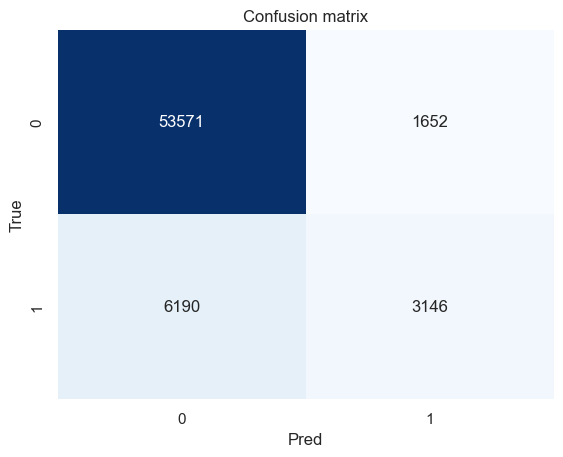

In [111]:
# Matriz de confusao para o melhor modelo - Random Forest

classes = np.unique(Y_teste)
labels = ['0', '1']

fig, ax = plt.subplots()
cm = metrics.confusion_matrix(Y_teste, previsoes_rf, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

<BarContainer object of 12 artists>

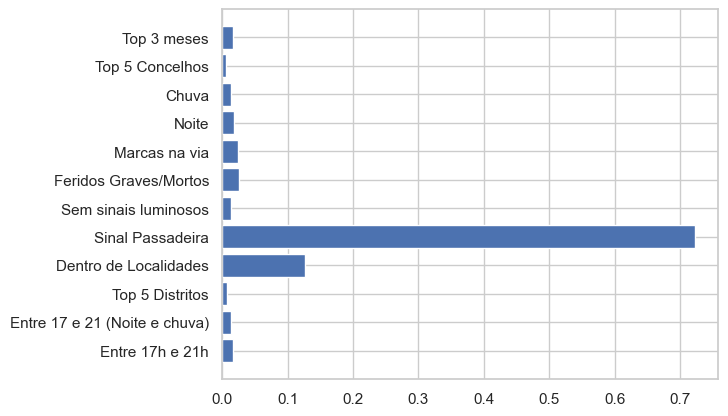

In [112]:
# Relevancia de variaveis no modelo Random Forest

feature_names = ['Entre 17h e 21h', 'Entre 17 e 21 (Noite e chuva)',
       'Top 5 Distritos', 'Dentro de Localidades', 'Sinal Passadeira',
       'Sem sinais luminosos', 'Feridos Graves/Mortos', 'Marcas na via',
       'Noite', 'Chuva', 'Top 5 Concelhos', 'Top 3 meses']

plt.barh(feature_names, random_forest_model.feature_importances_)

In [113]:
# Melhorias para o modelo

In [114]:
# Nova variavel para o modelo -  Categoria do Veiculo

condutores_d = condutores.drop_duplicates(subset='Id. Acidente')
condutores_categoria = condutores_d[['Id. Acidente','Categoria Veículos']]
acidentes_modelo_categoria = pd.merge(acidentes_modelo_id, condutores_categoria, on='Id. Acidente', how='inner')

acidentes_modelo_categoria['Ligeiro ou pesado'] = np.where(
    (acidentes_modelo_categoria['Categoria Veículos'] == 'Automóvel ligeiro') | 
    (acidentes_modelo_categoria['Categoria Veículos'] == 'Automóvel pesado'), 1, 0)

acidentes_modelo_categoria = acidentes_modelo_categoria.drop(columns=['Categoria Veículos'])

# Outra nova variavel para o modelo - 2 ou mais condutores em um acidente

condutores_por_id = condutores.groupby(condutores['Id. Acidente']).size().reset_index(name='Condutores')
condutores_por_id = condutores_por_id.loc[condutores_por_id['Condutores'] > 1]

acidentes_modelo_categoria['Mais de 1 condutor'] = acidentes_modelo_categoria['Id. Acidente'].isin(condutores_por_id['Id. Acidente'])
acidentes_modelo_categoria['Mais de 1 condutor'] = np.where((acidentes_modelo_categoria['Mais de 1 condutor'] == True), 1, 0)

# Outra variavel para o modelo - Velocidade Geral

acidentes_velociade_geral = acidentes[['Id. Acidente', 'Velocidade geral']]
acidentes_modelo_categoria = pd.merge(acidentes_velociade_geral, acidentes_modelo_categoria, on='Id. Acidente', how='inner')
acidentes_modelo_categoria['Vel. geral > 50'] = np.where((acidentes_modelo_categoria['Velocidade geral'] > 50), 1, 0)

# Outra variavel para o modelo - Interseccao de vias

acidentes_intersecao = acidentes[['Id. Acidente', 'Intersecção Vias']]
acidentes_modelo_categoria = pd.merge(acidentes_intersecao, acidentes_modelo_categoria, on='Id. Acidente', how='inner')
acidentes_modelo_categoria['Fora Interseccao'] = np.where((acidentes_modelo_categoria['Intersecção Vias'] == 'Fora da intersecção'), 1, 0)

acidentes_modelo_categoria = acidentes_modelo_categoria.drop(columns=['Id. Acidente', 'Intersecção Vias', 'Velocidade geral'])

In [115]:
# multicolineariade com as NOVAS variaveis preditoras 

def cramer_v(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    num_rows = contingency_table.shape[0]
    num_cols = contingency_table.shape[1]
    min_dim = min(num_rows - 1, num_cols - 1)
    return np.sqrt(chi2 / (len(df) * min_dim))

colunas = acidentes_modelo_categoria.columns
combinacoes = list(combinations(colunas, 2))

for col1, col2 in combinacoes:
    v_cramer = cramer_v(acidentes_modelo_categoria, col1, col2)
    if v_cramer > 0.5:
        print(f"V de Cramer para {col1} e {col2}: {v_cramer}")

V de Cramer para Dentro de Localidades e Vel. geral > 50: 0.8032427009221319


In [116]:
# Dropar variaveis pouco influentes e 'Dentro de Localidades' por ter alta correlacao com Vel. Geral > 50

acidentes_modelo_categoria = acidentes_modelo_categoria.drop(columns=['Top 5 Distritos', 'Top 5 Concelhos', 'Dentro de Localidades'])

In [117]:
# Testando modelo Random Forest com as melhorias acima

# divisao conjunto de treino e de teste 

X = acidentes_modelo_categoria.drop(columns=["Atropelamento"])
Y = acidentes_modelo_categoria["Atropelamento"]

X_treino_1, X_teste_1, Y_treino_1, Y_teste_1 = train_test_split(X, Y, test_size=0.2, random_state=42)

# Random Forest

random_forest_model_1 = RandomForestClassifier(n_estimators=100, random_state=42)

# treinando

random_forest_model_1.fit(X_treino_1, Y_treino_1)

# testando

previsoes_rf_1 = random_forest_model_1.predict(X_teste_1)

# Avaliacao do modelo - Random Forest

# Accuracy 

accuracy_rf_1 = accuracy_score(Y_teste_1, previsoes_rf_1)
accuracy_rf_1 = round(accuracy_rf_1, 3)

# Recall 

recall_rf_1 = recall_score(Y_teste_1, previsoes_rf_1)
recall_rf_1 = round(recall_rf_1, 3)

# Precision

precision_rf_1 = precision_score(Y_teste_1, previsoes_rf_1)
precision_rf_1 = round(precision_rf_1, 3)

# AUC 

auc_rf_1 = roc_auc_score(Y_teste_1, previsoes_rf_1)
auc_rf_1 = round(auc_rf_1, 3)

# F1 Score

f1_rf_1 = f1_score(Y_teste_1, previsoes_rf_1)
f1_rf_1 = round(f1_rf_1, 3)

dados_rf_1 = {'Accuracy': accuracy_rf_1,
            'Recall': recall_rf_1,
            'Precision': precision_rf_1,
            'AUC': auc_rf_1,
            'F1 Score': f1_rf_1 }

dados_rf_1 = pd.DataFrame(dados_rf_1, index=['Random Forest_Melhoria'])
dados_rf_todos = pd.concat([dados_rf_1, dados_rf_], axis=0)

In [118]:
dados_rf_todos

,Accuracy,Recall,Precision,AUC,F1 Score
Random Forest_Melhoria,0.907,0.547,0.741,0.758,0.630
Random Forest,0.879,0.337,0.656,0.654,0.445


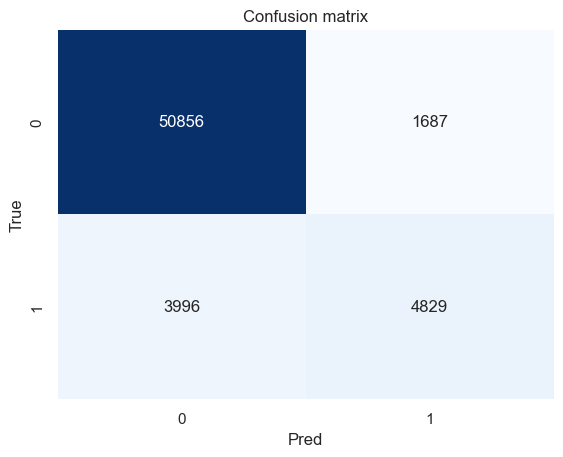

In [119]:
# Matriz de confusao para o melhor modelo melhorado 1 - Random Forest

classes = np.unique(Y_teste_1)
labels = ['0', '1']

fig, ax = plt.subplots()
cm = metrics.confusion_matrix(Y_teste_1, previsoes_rf_1, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

<BarContainer object of 13 artists>

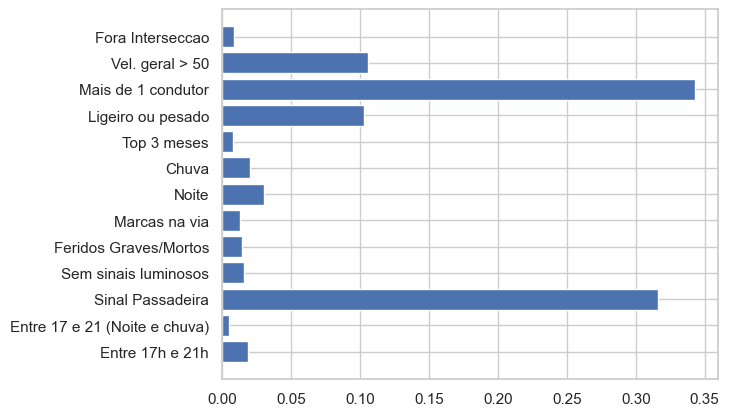

In [120]:
# Relevancia de variaveis no modelo Random Forest

feature_names = ['Entre 17h e 21h', 'Entre 17 e 21 (Noite e chuva)',
       'Sinal Passadeira', 'Sem sinais luminosos', 'Feridos Graves/Mortos',
       'Marcas na via', 'Noite', 'Chuva', 'Top 3 meses', 'Ligeiro ou pesado',
       'Mais de 1 condutor', 'Vel. geral > 50', 'Fora Interseccao']

plt.barh(feature_names, random_forest_model_1.feature_importances_)

In [121]:
# Testando agora so com as top 4 variaveis mais influentes

acidentes_modelo_top4 = acidentes_modelo_categoria.drop(columns=['Entre 17h e 21h', 'Entre 17 e 21 (Noite e chuva)', 'Sem sinais luminosos',
                                                                    'Feridos Graves/Mortos', 'Marcas na via', 'Noite', 'Chuva', 'Top 3 meses', 'Fora Interseccao'])

X = acidentes_modelo_top4.drop(columns=["Atropelamento"])
Y = acidentes_modelo_top4["Atropelamento"]

X_treino_2, X_teste_2, Y_treino_2, Y_teste_2 = train_test_split(X, Y, test_size=0.2, random_state=42)

# Random Forest

random_forest_model_2 = RandomForestClassifier(n_estimators=100, random_state=42)

# treinando

random_forest_model_2.fit(X_treino_2, Y_treino_2)

# testando

previsoes_rf_2 = random_forest_model_2.predict(X_teste_2)

# Avaliacao do modelo - Random Forest

# Accuracy 

accuracy_rf_2 = accuracy_score(Y_teste_2, previsoes_rf_2)
accuracy_rf_2 = round(accuracy_rf_2, 3)

# Recall 

recall_rf_2 = recall_score(Y_teste_2, previsoes_rf_2)
recall_rf_2 = round(recall_rf_2, 3)

# Precision

precision_rf_2 = precision_score(Y_teste_2, previsoes_rf_2)
precision_rf_2 = round(precision_rf_2, 3)

# AUC 

auc_rf_2 = roc_auc_score(Y_teste_2, previsoes_rf_2)
auc_rf_2 = round(auc_rf_2, 3)

# F1 Score

f1_rf_2 = f1_score(Y_teste_2, previsoes_rf_2)
f1_rf_2 = round(f1_rf_2, 3)

dados_rf_2 = {'Accuracy': accuracy_rf_2,
            'Recall': recall_rf_2,
            'Precision': precision_rf_2,
            'AUC': auc_rf_2,
            'F1 Score': f1_rf_2 }

dados_rf_2 = pd.DataFrame(dados_rf_2, index=['Random Forest_2'])
dados_rf_todos_1 = pd.concat([dados_rf_todos, dados_rf_2], axis=0)

In [122]:
dados_rf_todos_1

,Accuracy,Recall,Precision,AUC,F1 Score
Random Forest_Melhoria,0.907,0.547,0.741,0.758,0.630
Random Forest,0.879,0.337,0.656,0.654,0.445
Random Forest_2,0.899,0.321,0.931,0.658,0.477


<BarContainer object of 4 artists>

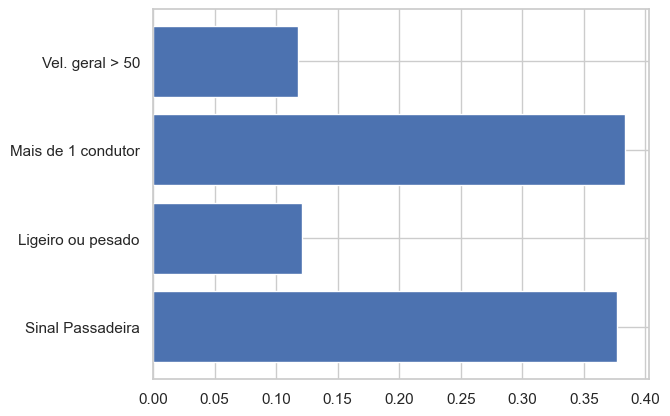

In [123]:
feature_names = ['Sinal Passadeira', 'Ligeiro ou pesado',
       'Mais de 1 condutor', 'Vel. geral > 50']

plt.barh(feature_names, random_forest_model_2.feature_importances_)

In [124]:
# O primeiro melhorado foi melhor

# Mudando o threshold do Random Forest melhorado 1

previsoes_rf_1_03 = (random_forest_model_1.predict_proba(X_teste_1)[:,1] >= 0.30).astype(int)

# Avaliacao do modelo - Random Forest melhorado 1 com threshold de 0.3

# Accuracy 

accuracy_rf_1_03 = accuracy_score(Y_teste_1, previsoes_rf_1_03)
accuracy_rf_1_03 = round(accuracy_rf_1_03, 3)

# Recall 

recall_rf_1_03 = recall_score(Y_teste_1, previsoes_rf_1_03)
recall_rf_1_03 = round(recall_rf_1_03, 3)

# Precision

precision_rf_1_03 = precision_score(Y_teste_1, previsoes_rf_1_03)
precision_rf_1_03 = round(precision_rf_1_03, 3)

# AUC 

auc_rf_1_03 = roc_auc_score(Y_teste_1, previsoes_rf_1_03)
auc_rf_1_03 = round(auc_rf_1_03, 3)

# F1 Score

f1_rf_1_03 = f1_score(Y_teste_1, previsoes_rf_1_03)
f1_rf_1_03 = round(f1_rf_1_03, 3)

dados_rf_1_03 = {'Accuracy': accuracy_rf_1_03,
            'Recall': recall_rf_1_03,
            'Precision': precision_rf_1_03,
            'AUC': auc_rf_1_03,
            'F1 Score': f1_rf_1_03 }

dados_rf_1_03_df = pd.DataFrame(dados_rf_1_03, index=['Random Forest_Melhoria_03'])
dados_rf_1_1_03 = pd.concat([dados_rf_1_03_df, dados_rf_1, dados_rf_], axis=0)

dados_rf_1_1_03

,Accuracy,Recall,Precision,AUC,F1 Score
Random Forest_Melhoria_03,0.890,0.834,0.581,0.866,0.685
Random Forest_Melhoria,0.907,0.547,0.741,0.758,0.630
Random Forest,0.879,0.337,0.656,0.654,0.445


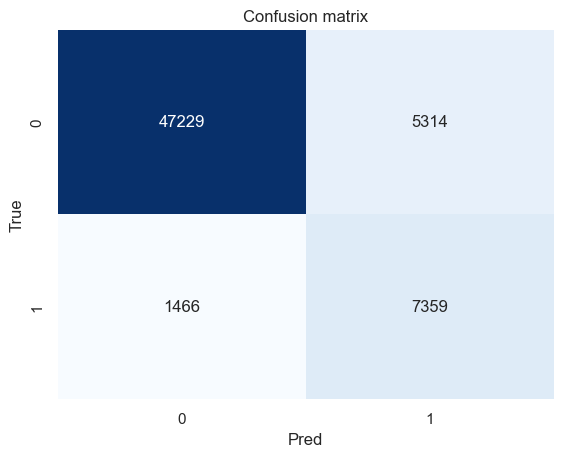

In [125]:
# Matriz de confusao para o melhor modelo melhorado 1 - Random Forest

classes = np.unique(Y_teste_1)
labels = ['0', '1']

fig, ax = plt.subplots()
cm = metrics.confusion_matrix(Y_teste_1, previsoes_rf_1_03, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()